## MSc Data Analytics Feb 2023 FT - CA2

### An analysis of Employment rates in the Construction Sector in the Euro Zone

This notebook is part of a report under the scenario of construction considering Ireland as a base point for the analysis The report initially investigates the number of new building permits over the period from 2012 to 2022 for the Irish State and followed by a broader analysis to compare Ireland with four other countries in the Euro Zone. For that it was used the most updated nominal GDP values in OECD database to obtain the highest values in 2022 and based on this ranking the countries selected were the top 5 (in which Ireland is part of). 

In this report, several echniques of data exploration, cleaning, preparation and visualisation were used to find the adequate statistical distribution patterns for applicaiton of justifyable Hypothesis Testing and  Machine Learning models for plannig permissions predictions as well as the availability of construction workers to provide insights of future increase in workforce demands in the sector.

Author: Clarissa Cardoso

Student ID:2020274

#### Importing required libraries for stating the project

In [1]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd #dataframes 
import numpy as np #linear algebra
import seaborn as sns #visualization
sns.set(color_codes=True)

import scipy.stats as stats #statistical resources

import matplotlib.pyplot as plt #visualisation 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import panel as pn
import param
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as ticker



import os

from sklearn.model_selection import train_test_split # importing function to split the data training and test.
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler module from sklearn.preprocessing library
from sklearn.linear_model import LinearRegression # importing to performe linear regression. 
from sklearn.metrics import make_scorer, r2_score # Importing from Metrics module
from sklearn.preprocessing import StandardScaler # standardize the data
from sklearn import metrics # Metrics module from scikit-learn
from sklearn.model_selection import GridSearchCV # importing for hyperparameter tunning
from sklearn.metrics import mean_squared_error # importing mse
from scipy.stats import shapiro




## Part I - Planning Permissios for New Houses and Apartments in Ireland

### 1.1 Data Cleaning 

#### Importing csv file containing Planning Permissions for New Houses and Apartments - Ireland (1975 to 2022)

Source: Central Statistics Office, Ireland

In [2]:
#Import dataset
data = pd.read_csv("Planning_Permissions_Granted_for_New_Houses_and_Apartments.csv")

In [3]:
#Display heading to have a first look on the data, show 10 first rows
data.head(10)

Unnamed: 0 Planning Permissions Granted  \
0  Source: Central Statistics Office, Ireland.                          NaN   
1                                         1975                          NaN   
2                                         1976                          NaN   
3                                         1977                       12,390   
4                                         1978                       13,870   
5                                         1979                       15,897   
6                                         1980                       14,220   
7                                         1981                       14,096   
8                                         1982                       13,082   
9                                         1983                       10,895   

  Units for which Permission Granted  \
0                                NaN   
1                             23,028   
2                             24,616   
3                             29,402   
4                             28,408   
5                             33,474   
6                             30,898   
7                             34,041   
8                             31,641   
9                             31,227   

  Total Floor Area for which Permission Granted  Average Floor Area per Unit  
0                                           NaN                          NaN  
1                                           NaN                          NaN  
2                                           NaN                          NaN  
3                                         3,103                        105.5  
4                                         3,167                        111.5  
5                                         3,855                        115.2  
6                                         3,676                        119.0  
7                                         4,005                        117.7  
8                                         3,690                        116.6  
9                                         3,522                        112.8

In [4]:
#print summarised information from dataframe 
data.info()
print(data.shape)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     49 non-null     object 
 1   Planning Permissions Granted                   45 non-null     object 
 2   Units for which Permission Granted             48 non-null     object 
 3   Total Floor Area for which Permission Granted  45 non-null     object 
 4   Average Floor Area per Unit                    45 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.0+ KB
(49, 5)
Unnamed: 0                                       0
Planning Permissions Granted                     4
Units for which Permission Granted               1
Total Floor Area for which Permission Granted    4
Average Floor Area per Unit                      4
dtype: int64


##### The info() method from pandas prints basic information of the dataframe, alied with the shape method to understand its dimensionality 

For the Planning Permissions dataframe a total of 49 observations divided in 5 columns, where the datatype for the first four are classified as objects and the last being a numeric value. Looking closer to the heading of the data, the values are expected to be all in numeric form, which requires data preparation techniques to be applied and redefine the datatypes using a function from numpy library. Notice that the comma within the values indicate why the dtype is considered to be object. 

the info() also brings the non-null values which helps to identify the missing data, confirmed by the isnull().sum() method that this dataframe contains missing data in four columns represented in the first 3 observations as well as the data missing for 1999 in the original report. 

Line [5] objective is to check the final 5 rows of the dataset and see if values are displayed accordanly with the period requested in the CSO database (until 2022)

In [5]:
#see the last 5 rows of the dataframe
data.tail()

Unnamed: 0 Planning Permissions Granted Units for which Permission Granted  \
44       2018                        6,103                             19,964   
45       2019                        6,265                             19,563   
46       2020                        5,844                             17,709   
47       2021                        7,971                             16,719   
48       2022                        7,401                             17,454   

   Total Floor Area for which Permission Granted  Average Floor Area per Unit  
44                                         3,166                        159.0  
45                                         3,090                        158.0  
46                                         2,732                        154.0  
47                                         2,915                        174.0  
48                                         2,915                        167.0

In [6]:
#replace commas from dataset to convert values from object to integers
data.replace(',','', regex=True, inplace=True)

# rename first column for "Year" so we can later set it as index
# rename other columns to shorten their labels for a more compact label and make visualisations easier
data = data.rename(columns={'Unnamed: 0':'Year',
                           'Total Floor Area for which Permission Granted':'Permissions Granted (sq m)',
                            'Units for which Permission Granted':'Total Units of Permission Granted',
                           'Average Floor Area per Unit': 'Avg Area per Unit (sq m)'})

#print dataframe to test and confirm this cleaning technique worked
data.head()

Year Planning Permissions Granted  \
0  Source: Central Statistics Office Ireland.                          NaN   
1                                        1975                          NaN   
2                                        1976                          NaN   
3                                        1977                        12390   
4                                        1978                        13870   

  Total Units of Permission Granted Permissions Granted (sq m)  \
0                               NaN                        NaN   
1                             23028                        NaN   
2                             24616                        NaN   
3                             29402                       3103   
4                             28408                       3167   

   Avg Area per Unit (sq m)  
0                       NaN  
1                       NaN  
2                       NaN  
3                     105.5  
4                     111.5

The commas are gone (great!) but the dtypes have not changed. 

Next step is to convert columns with object data types to numeric type using a pandas function pd.to_numeric( ). 

At first, it was tested to change all objects to numeric types but was not succesfull on the first attempt.  
The first row on axis [0] contains data that cannot be converted to numeric ["Source: Central Statistics Office Ireland."], so the solution found was to invert the order of commands: first drop all observations with missing data and then perform the conversion. 

Pandas also has a feature to change the dtype by using astype( ) and defining an specific type to convert to, offering a large set of possibilities of conversion.  However pd.to_numeric( ) has more has more powerful functions for error handling since by default the it will return either float64 or int64 (Chen, 2021 https://towardsdatascience.com/converting-data-to-a-numeric-type-in-pandas-db9415caab0b). 


In [7]:
#drop Nan Values to clean data
data = data.dropna(subset=data.columns[:3])

# Reset the index
data.set_index("Year", inplace=True)
# Display the updated DataFrame
display(data.head())

Planning Permissions Granted Total Units of Permission Granted  \
Year                                                                  
1977                        12390                             29402   
1978                        13870                             28408   
1979                        15897                             33474   
1980                        14220                             30898   
1981                        14096                             34041   

     Permissions Granted (sq m)  Avg Area per Unit (sq m)  
Year                                                       
1977                       3103                     105.5  
1978                       3167                     111.5  
1979                       3855                     115.2  
1980                       3676                     119.0  
1981                       4005                     117.7

In [8]:
# specify which columns to convert to numeric dtype
cols_to_convert = ["Planning Permissions Granted", "Total Units of Permission Granted", "Permissions Granted (sq m)"]

# use the to_numeric method to convert the columns to numeric type
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric)


#print info to confirm conversion
print(data.info())
print(data.shape)
# display heading the updated DataFrame
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1977 to 2022
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Planning Permissions Granted       45 non-null     int64  
 1   Total Units of Permission Granted  45 non-null     int64  
 2   Permissions Granted (sq m)         45 non-null     int64  
 3   Avg Area per Unit (sq m)           45 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.8+ KB
None
(45, 4)


Planning Permissions Granted  Total Units of Permission Granted  \
Year                                                                    
1977                         12390                              29402   
1978                         13870                              28408   
1979                         15897                              33474   
1980                         14220                              30898   
1981                         14096                              34041   

      Permissions Granted (sq m)  Avg Area per Unit (sq m)  
Year                                                        
1977                        3103                     105.5  
1978                        3167                     111.5  
1979                        3855                     115.2  
1980                        3676                     119.0  
1981                        4005                     117.7

We can see all values are now classified as  numeric types:
- The features: Planning Permissions Granted, Total Units of Permission Granted and Permissions Granted (sq m) are identified as integers (int64)
- Avg Area per Unit (sq m) is classified as float due to its continuous nature. 

In [9]:
data.describe()

Planning Permissions Granted  Total Units of Permission Granted  \
count                     45.000000                          45.000000   
mean                   10934.000000                       28359.600000   
std                     5826.388016                       18910.501162   
min                     3103.000000                        5389.000000   
25%                     6396.000000                       16719.000000   
50%                     9126.000000                       19964.000000   
75%                    14096.000000                       33474.000000   
max                    25751.000000                       75650.000000   

       Permissions Granted (sq m)  Avg Area per Unit (sq m)  
count                   45.000000                 45.000000  
mean                  3921.777778                143.180000  
std                   2714.805860                 28.940822  
min                   1110.000000                 73.800000  
25%                   2258.000000                119.000000  
50%                   2981.000000                139.500000  
75%                   4127.000000                167.000000  
max                  11278.000000                206.000000

### 1.2 EDA and Data Visualisation 

To better understand how the data is distribuited, using seaborn's pairplot function with the kernel density estimation to visualise the distribuition of each variable as well as their overall shape, peaks and skewness of the data and possible relationship between various columns.

This also allows to see a compact representation of the distribuition to comapre different variables at the same time and identify any patterns between them with less noise than a default pairplot, since it estimates the density based on the observed data points.   


Also, it was created a series of plots to see how the Planning Permissions changed over time through the use of different libraries for visialisation, such as Seaborn and Pyplot with added interactive features. 

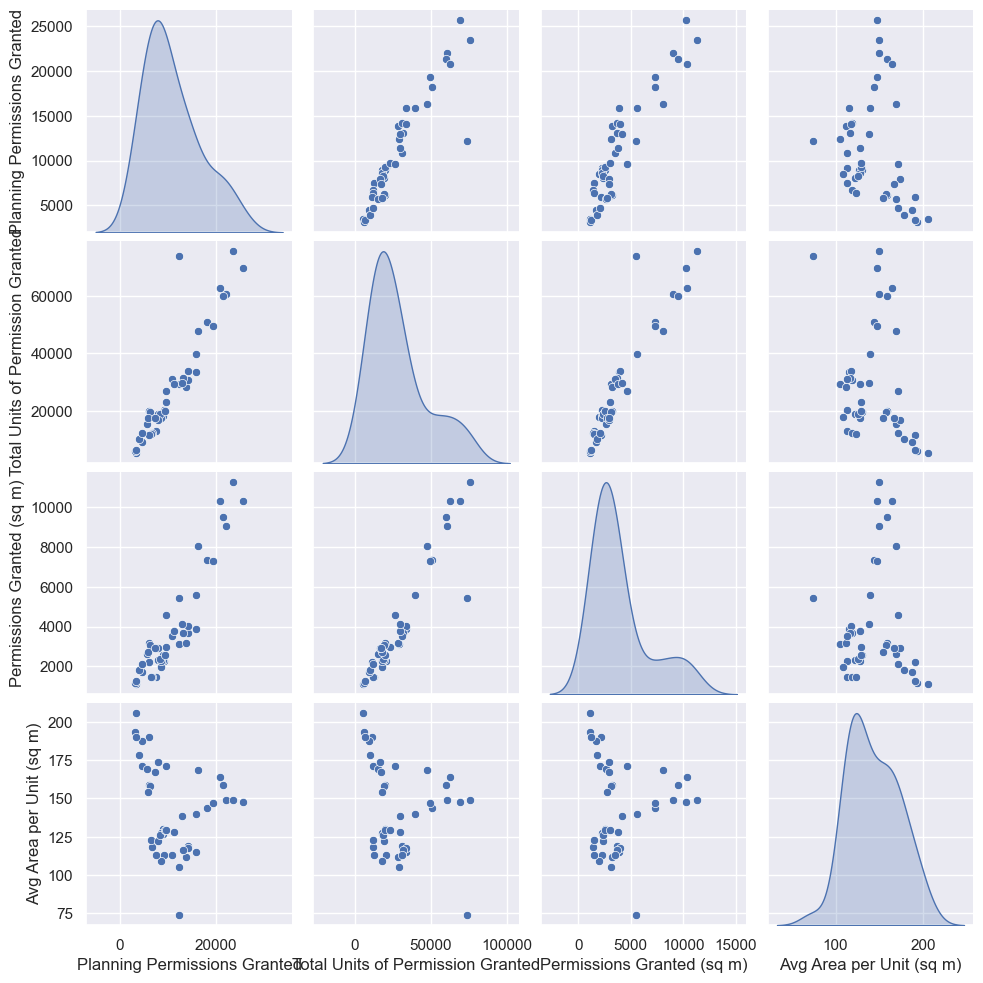

In [10]:
sns.pairplot(data=data, diag_kind='kde')

From this plot is possible to infere that the values are not following a normal distribuition.  

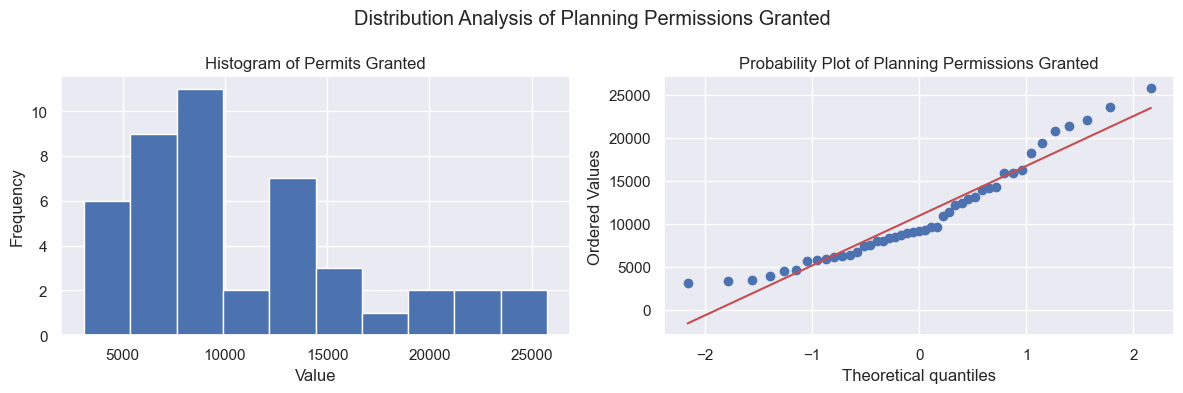

In [11]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram of number of permissions in the first subplot
axs[0].hist(data['Planning Permissions Granted'], bins=10)
axs[0].set_title('Histogram of Permits Granted')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot probability plot of number of permissions in the second subplot
stats.probplot(data['Planning Permissions Granted'], dist='norm', plot=axs[1])
axs[1].set_title('Probability Plot of Planning Permissions Granted')

# Add a title for the combination of the two plots
plt.suptitle('Distribution Analysis of Planning Permissions Granted')

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

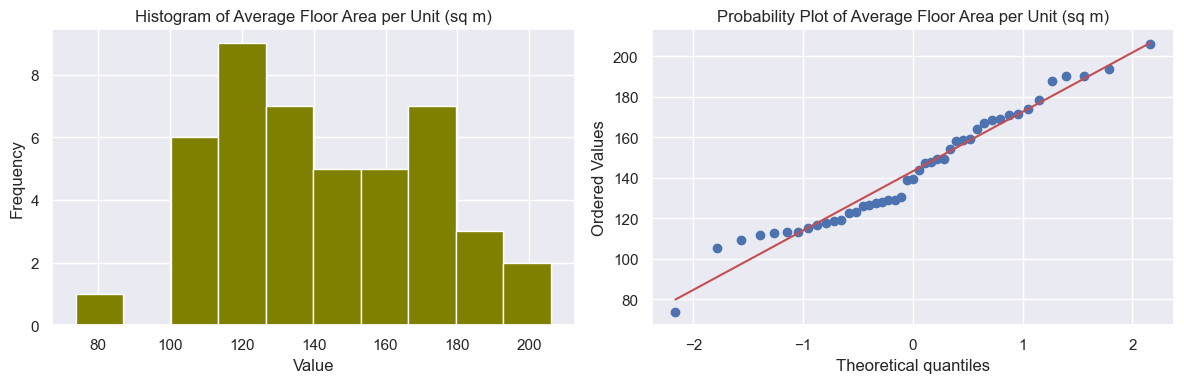

In [12]:
#Repeat the same line but to see how the 'Average Floor Area per Unit' colum behave


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram of number of permissions in the first subplot
axs[0].hist(data['Avg Area per Unit (sq m)'], bins=10, color='olive')
axs[0].set_title('Histogram of Average Floor Area per Unit (sq m)')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot probability plot of number of permissions in the second subplot
stats.probplot(data['Avg Area per Unit (sq m)'], dist='norm', plot=axs[1])
axs[1].set_title('Probability Plot of Average Floor Area per Unit (sq m)')

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

In [13]:
import plotly.graph_objects as go

# Create the bar plot using go.Figure
fig = go.Figure(go.Bar(
    x=data.index,  # Years on the x-axis
    y=data['Planning Permissions Granted'],  # Planning Permissions Granted on the y-axis
    marker_color='salmon',  # Set the color of the bars
))

# Set labels and title
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Planning Permissions Granted',
    title='Histogram of Planning Permissions Granted for Each Year',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility at 45 degrees
)

# Add hover text to display the values
fig.update_traces(
    hovertemplate='Year: %{x}<br>Planning Permissions Granted: %{y}',  # Define the hover text template
    hoverinfo='text+y',  # Set the hover information to display both text and y-axis value
)

# Display the plot
fig.show()

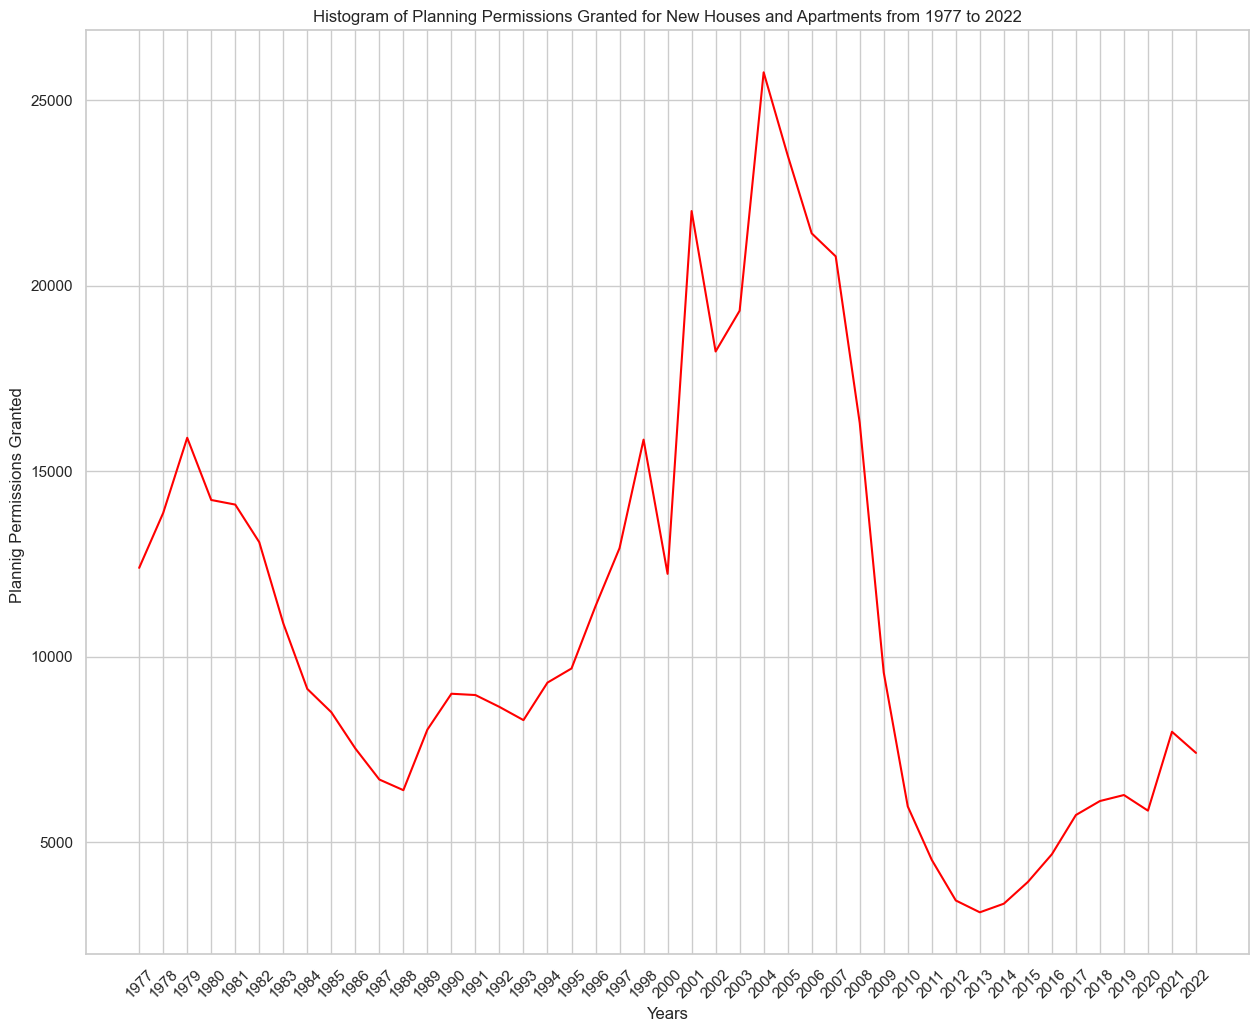

In [14]:
# Create a  plot with the same data but using seaborn library to compare the graphics, and as a line chart


# Adjust the figure size
plt.figure(figsize=(15,12))


# Set seaborn style
sns.set(style='whitegrid')

# Create a histogram using seaborn
sns.lineplot(data=data, x=data.index, y='Planning Permissions Granted', color='red')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Plannig Permissions Granted ')
plt.title('Histogram of Planning Permissions Granted for New Houses and Apartments from 1977 to 2022')

# Rotate x-axis labels for better visibility at 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Comparing the progression of all variables over the years

At the same time compare different results got from various libraries for the visualisation

 **Seaborn is used for quick and easy creation of static statistical plots with a high-level interface working with minimal code. On the other hand, Plotly go.Figure is more suitable for creating highly customizable and interactive plots, particularly for web-based applications (dashbords) or scenarios where interactivity and customization are crucial**

## Seaborn line plot ( )

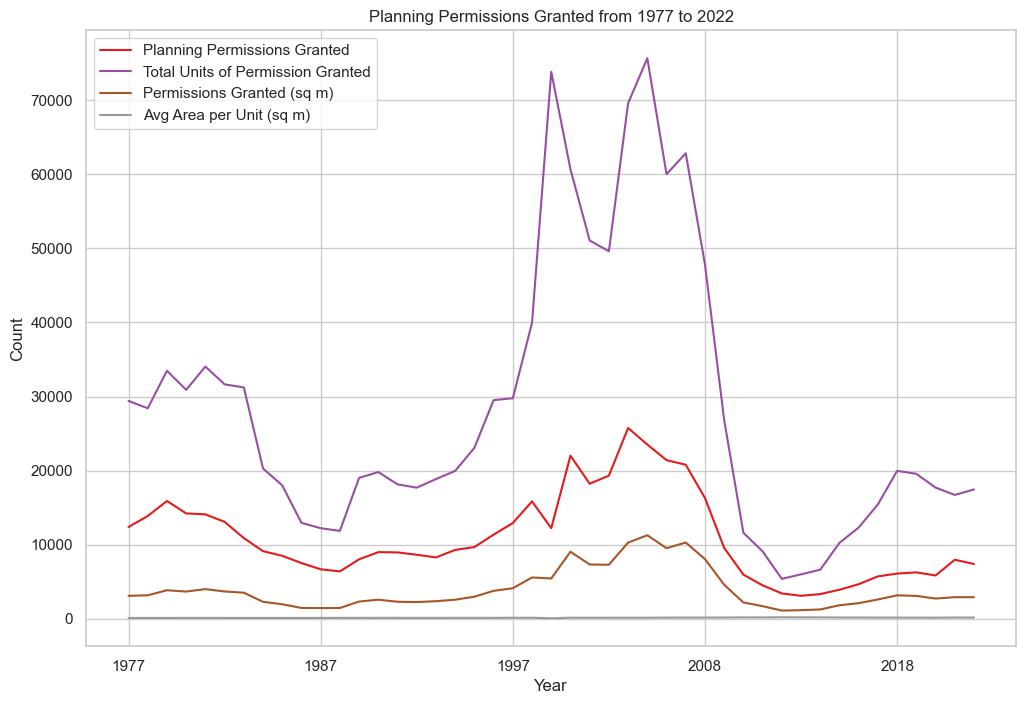

In [15]:
#set seaborn style
sns.set_style("whitegrid")

# create line plot with permissions and units 
data.plot(kind='line', stacked=False, cmap='Set1', figsize=(12, 8))


# Get the current y-axis object
#y_axis = plt.gca().yaxis

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Planning Permissions Granted from 1977 to 2022')
plt.legend(loc='upper left')


# Show the plot
plt.show()


## Plotly line plot with go.Figure( )

In [16]:
# with labels inside the plot stacked line 
# Create the line plot using go.Figure
fig = go.Figure()

# Add a trace for each column in the data
for column in data.columns:
    fig.add_trace(go.Scatter(
        x=data.index,  # Years on the x-axis
        y=data[column],  # Count values on the y-axis
        name=column,
        mode='lines',  # Set the mode to lines
        stackgroup='one',  # Stack the lines on top of each other
    ))

# Set labels and title
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count',
    title='Planning Permissions Granted from 1977 to 2022',
    legend=dict(x=0, y=1),  # Position the legend at the top-left corner
    xaxis_tickangle=-45,  # Adjust the rotation of the x-axis labels to -45 degrees
)


# Add hover text to display the values
fig.update_traces(
    hovertemplate='Year: %{x}<br>Count: %{y}',  # Define the hover text template
    hoverinfo='text+y',  # Set the hover information to display both text and y-axis value
)

# Display the plot
fig.show()

In [17]:
# Renaming df for more clarity and to not overlap with further variables or funtions through out the project.
ireland_permits = data
ireland_permits.head()

Planning Permissions Granted  Total Units of Permission Granted  \
Year                                                                    
1977                         12390                              29402   
1978                         13870                              28408   
1979                         15897                              33474   
1980                         14220                              30898   
1981                         14096                              34041   

      Permissions Granted (sq m)  Avg Area per Unit (sq m)  
Year                                                        
1977                        3103                     105.5  
1978                        3167                     111.5  
1979                        3855                     115.2  
1980                        3676                     119.0  
1981                        4005                     117.7

In [18]:
# Creating the line plot for new house prices in the state with labels outside the plot and  
# Not stacked lines to improve visualisation


fig1 = go.Figure()
# Adds a trace (line) for each column.
for column in data.columns:
    fig1.add_trace(go.Scatter(
        x=ireland_permits.index, # Years in the x-axis.
        y=ireland_permits[column], # Values of each location in the y-axis 
        name=column))
    
# Setting the x-axis label and creating lines for the axis, 
fig1.update_xaxes(title_text='Period from 1977 to 2022',
    linewidth=2, # Increase the line width of the x-axis to 2.
    linecolor='black') # Selecting a color for the x-axis line. 

# Setting the y-axis label.
fig1.update_yaxes(title_text='Total of Planning Permissios',
    linewidth=2, # Increase the line width of the y-axis to 2.
    linecolor='black') # Selecting a color for the y-axis line.
# Setting the title.
fig1.update_layout(title_text='Line Plot by Planning Permissions over time', 
                    # plot_bgcolor='white', # Changes to white in the background for clear visualization of the lines 
                    title_x=0.5, # To center the title.  
                    title_font=dict(size=20)) # Adjusts the font size of the title to 20.

fig1.show() # Shows the line plot

## Boxplot with ireland_permits displayed individually 

Creating a boxplot with an added dropdown menu to see each variable separetly. 
First tried using *import dash library* but got an error, retried with *jupyter_dash* instead but also got an error.
Finally, after looking into Plotly Documentation  info on this subject was helpful to create the plot below: 
(Dropdown Menus in Python, Available at:https://plotly.com/python/dropdowns/ )


In [19]:
import plotly.graph_objects as go

# Create a list of numeric column names to plot
numeric_columns = ['Planning Permissions Granted', 'Total Units of Permission Granted', 'Permissions Granted (sq m)', 'Avg Area per Unit (sq m)']

colors = ['purple', 'gray', 'olive', 'salmon']

# Create boxplot for each column and store them in a list
traces = [go.Box(y=data[column], name=column, marker_color=colors[i], visible=(i==0)) for i, column in enumerate(numeric_columns)]

# Create a Figure and add all traces to it
fig2 = go.Figure(data=traces)

# Define the layout for the dropdown menu
dropdown_menu = [{'label': column, 'method': 'update',
                  'args': [{'visible': [i==j for i in range(len(numeric_columns))]},
                           {'title': f'Boxplot of {column}'}]} for j, column in enumerate(numeric_columns)]

# Setting the layout of the Figure
fig2.update_layout(
    updatemenus=[{
        'active': 0,
        'buttons': dropdown_menu,
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.35,
        'yanchor': 'top'
    }],
    title_text="Boxplot of Planning Permissions in Ireland",
    title_x=0.5,
    title_font=dict(size=20),
    template="plotly_white",
    height=600,
    width=800,
)

fig2.show()  # Display the figure.

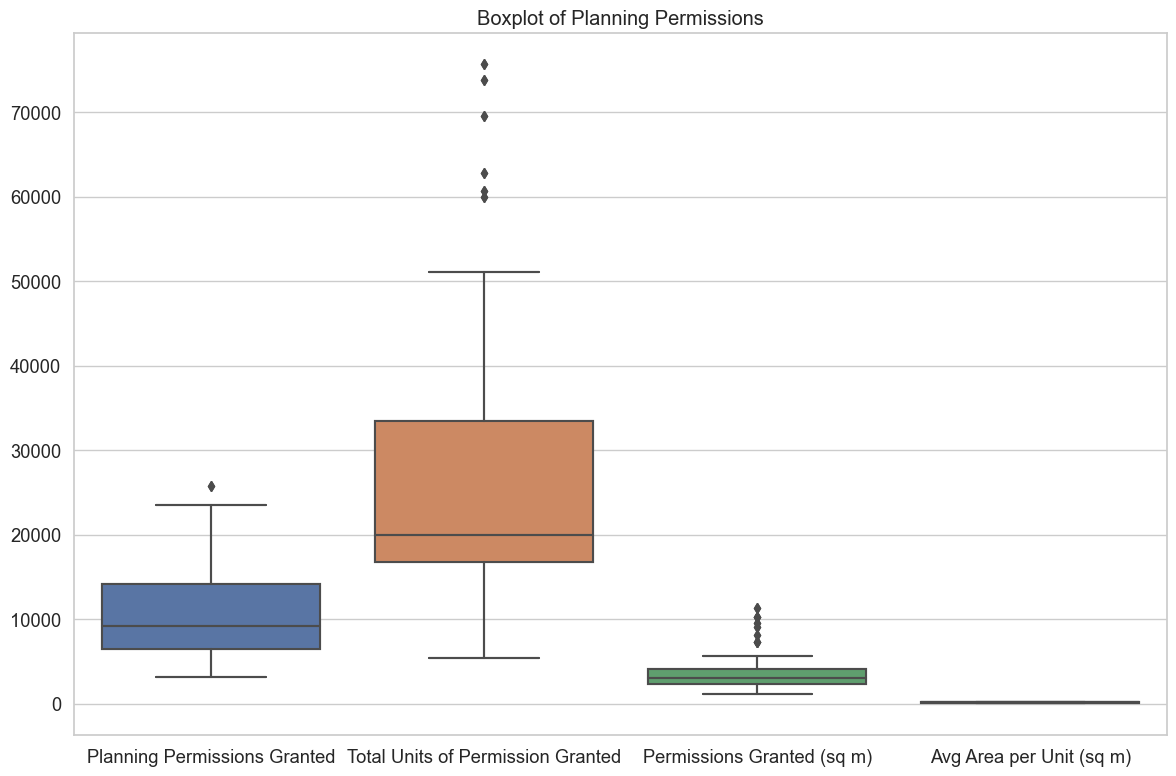

In [20]:
#create a boxplot with all the values to check difference in outliers 

# Creates the figure with the boxplots. 
plt.figure(figsize=(12, 8)) # Setting the figure size.

 # Addind a whitegrid background + adjust font scale.
sns.set(style="whitegrid", font_scale=1.2)


# Create the boxplot
ax = sns.boxplot(data=ireland_permits)

# Add title to the figure.
ax.set_title('Boxplot of Planning Permissions') 

# Add each data point with swarmplot to better identify values
# Each data point is maked in color black for contrast
sns.boxplot(data=ireland_permits)
plt.tight_layout() # Adjusts the layout.
plt.show() # Shows the plot.










**To interpret this boxplot considering all features, its comprehension is debilitaded since they are mesured in different units.
For example: Total Units of Permission Granted measured in discrete whole number (count by thousands of units, 1000, 2000, 3000...), while  the average area per sq m is in squared meters(105, 203...), hence the nearly invisible boxplot at the corner ledt representing this freature. So the solution is to use a standard scaler to display all values on the same scale and facilitate visialisation and understanding**

Different scales of the data features affect the modeling of a dataset adversely.

It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.

This is when standardization comes into picture.

Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data where uses the mean = 0 (zero) and standard deviation = 1 (Mulani, 2022) 

### Using StandardScaler() for *ireland_permits* dataset

In [21]:


# Creating a separate (copy) DataFrame for scaling.
permits_scaled = ireland_permits.copy()

# Standardize the variables.
scaler = StandardScaler() 
permits_scaled[["Planning Permissions Granted",'Total Units of Permission Granted', 
                "Permissions Granted (sq m)",'Avg Area per Unit (sq m)']] = scaler.fit_transform(
permits_scaled[["Planning Permissions Granted",'Total Units of Permission Granted', 
                "Permissions Granted (sq m)",'Avg Area per Unit (sq m)']])


#check values
print(permits_scaled.head())

      Planning Permissions Granted  Total Units of Permission Granted  \
Year                                                                    
1977                      0.252721                           0.055746   
1978                      0.509608                           0.002588   
1979                      0.861440                           0.273509   
1980                      0.570359                           0.135749   
1981                      0.548836                           0.303831   

      Permissions Granted (sq m)  Avg Area per Unit (sq m)  
Year                                                        
1977                   -0.305005                 -1.316679  
1978                   -0.281164                 -1.107017  
1979                   -0.024876                 -0.977725  
1980                   -0.091555                 -0.844939  
1981                    0.031001                 -0.890366  


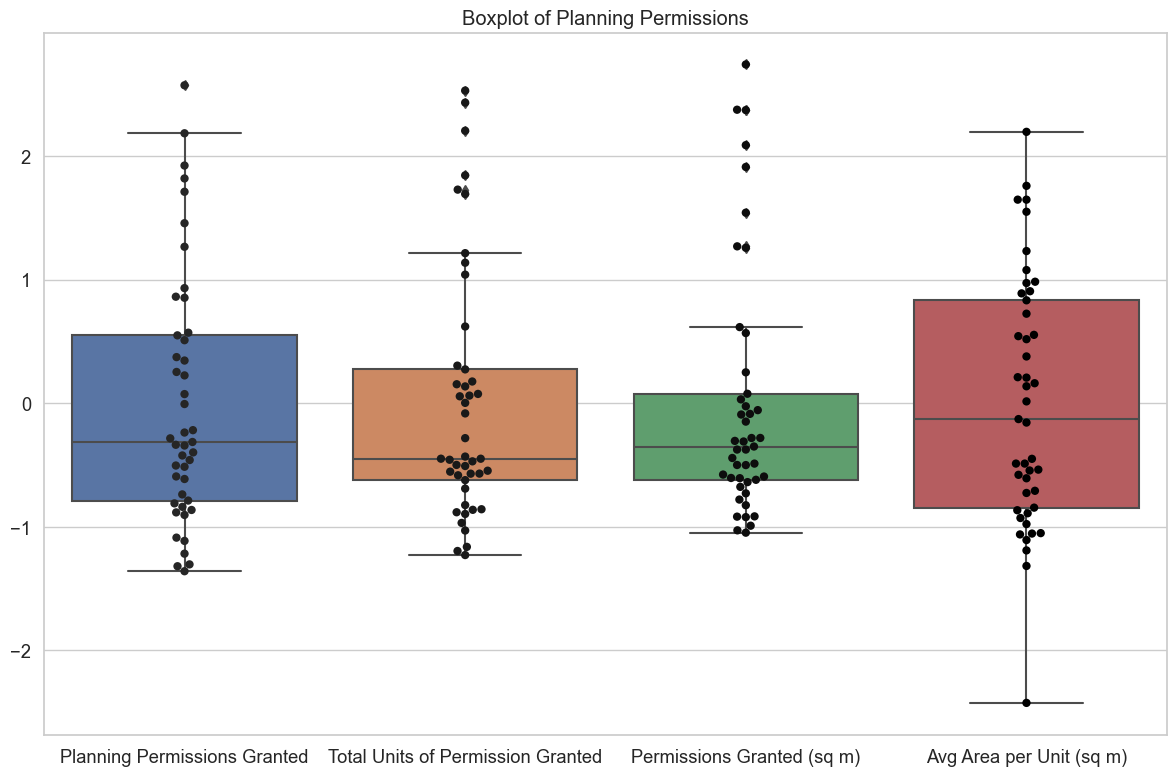

In [22]:
#create a boxplot with all the values to check difference in outliers 

# Creates the figure with the boxplots. 
plt.figure(figsize=(12, 8)) # Setting the figure size to display all labels clearly at x-axis

 # Addind a whitegrid background + adjust font scale.
sns.set(style="whitegrid", font_scale=1.2)


# Create the boxplot
ax = sns.boxplot(data=permits_scaled)

# Add title to the figure.
ax.set_title('Boxplot of Planning Permissions') 

# Add each data point with swarmplot to better identify values
# Each data point is maked in color black for contrast
sns.swarmplot(data=permits_scaled, color='black', size=6)
plt.tight_layout() # Adjusts the layout.
plt.show() # Shows the plot.

In [23]:
permits_scaled.describe()

Planning Permissions Granted  Total Units of Permission Granted  \
count                  4.500000e+01                       4.500000e+01   
mean                  -2.467162e-17                       9.868649e-17   
std                    1.011300e+00                       1.011300e+00   
min                   -1.359245e+00                      -1.228427e+00   
25%                   -7.876713e-01                      -6.225185e-01   
50%                   -3.138188e-01                      -4.489817e-01   
75%                    5.488357e-01                       2.735090e-01   
max                    2.571821e+00                       2.529006e+00   

       Permissions Granted (sq m)  Avg Area per Unit (sq m)  
count                   45.000000              4.500000e+01  
mean                     0.000000             -2.615192e-16  
std                      1.011300              1.011300e+00  
min                     -1.047423             -2.424395e+00  
25%                     -0.619778             -8.449390e-01  
50%                     -0.350452             -1.285929e-01  
75%                      0.076448              8.323593e-01  
max                      2.740287              2.195164e+00

## Checking correlation between variables using standardised scales

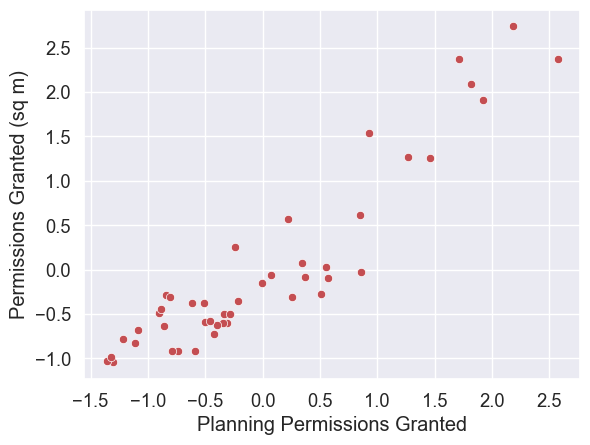

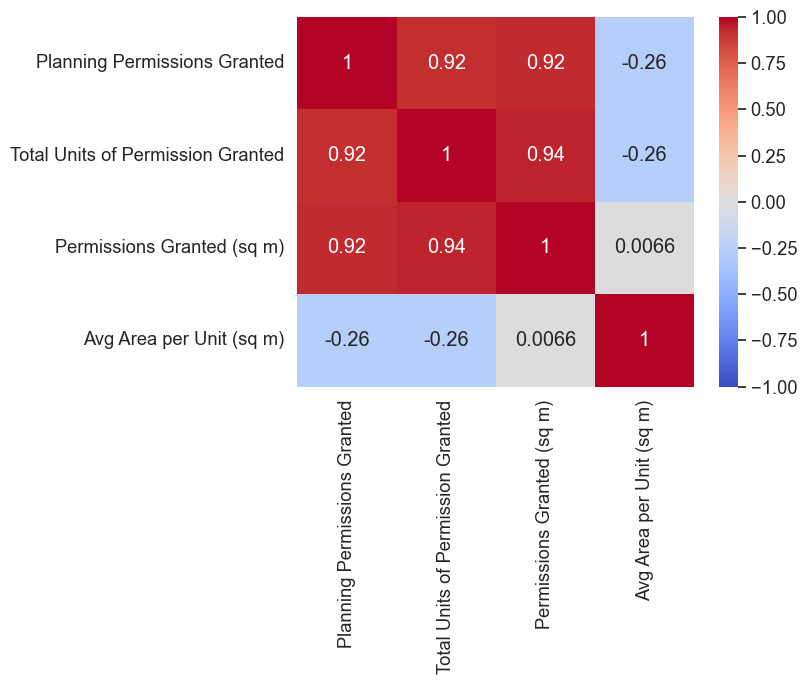

In [24]:
sns.set_style('darkgrid')

# create a scatterplot to show the relationship between the number of permissions and 
sns.scatterplot(x='Planning Permissions Granted', y='Permissions Granted (sq m)', data=permits_scaled, color='r')
plt.show()

# create a heatmap to show the correlation between the variables
sns.heatmap(ireland_permits.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm')
plt.show()

In [25]:
print(ireland_permits.corr())
# 0.92 correlation between 'Planning Permissions Granted' and 'Permissions Granted (sq m)'
# 0.94 correlation between 'Total Units of Permission Granted' and 'Permissions Granted (sq m)'

                                   Planning Permissions Granted  \
Planning Permissions Granted                           1.000000   
Total Units of Permission Granted                      0.919430   
Permissions Granted (sq m)                             0.924662   
Avg Area per Unit (sq m)                              -0.257886   

                                   Total Units of Permission Granted  \
Planning Permissions Granted                                0.919430   
Total Units of Permission Granted                           1.000000   
Permissions Granted (sq m)                                  0.937966   
Avg Area per Unit (sq m)                                   -0.258813   

                                   Permissions Granted (sq m)  \
Planning Permissions Granted                         0.924662   
Total Units of Permission Granted                    0.937966   
Permissions Granted (sq m)                           1.000000   
Avg Area per Unit (sq m)                   

In [26]:
# Perform a Spearman's rank correlation of probability of obtainig a extreme correlation betwenn the variables
# Opposed to the null-hypotesis would be that no correlation is the truth

res = stats.spearmanr(ireland_permits['Planning Permissions Granted'], ireland_permits['Permissions Granted (sq m)'])

# Retrieve the correlation statistic and p-value
correlation_statistic = res.correlation
p_value = res.pvalue

# Print the results
print("Correlation Statistic:", correlation_statistic)
print("p-value:", p_value)

Correlation Statistic: 0.8831647951034406
p-value: 9.928655518255424e-16



The correlation statistic of 0.883 suggests a strong positive correlation between the variables in the test .

While the very small p-value, very close to zero **(p= 9.92e-16)**, indicates this correlation would unlikely occur at random or alone, providing strong evidence to **reject** the null hypothesis of no correlation.

### Performing Shapiro-Wilk Test to check Normal Distribution

In [27]:
# Perform a hypothesis test that the data comes from a Normal distribution:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for Normality of the data:
shapiro(ireland_permits)
#pvalue for regression/classification of dataset into 0 andm 1. pvalue sumarise a lot of values to make a decision.

#if in this case, my pvalue >0.05 = data Normal distribuition ///  if not, other techniques must be applied 

ShapiroResult(statistic=0.71467125415802, pvalue=2.756948479322286e-17)

In [28]:
#Shapiro test for multiple features:
# Iterate over each feature and perform Shapiro-Wilk test
for column in data.columns:
    stat, p_value = stats.shapiro(data[column])
    print(f"Shapiro-Wilk test for '{column}': statistic={stat}, p-value={p_value}")

Shapiro-Wilk test for 'Planning Permissions Granted': statistic=0.9254747629165649, p-value=0.006512767635285854
Shapiro-Wilk test for 'Total Units of Permission Granted': statistic=0.8670065402984619, p-value=0.00010341706365579739
Shapiro-Wilk test for 'Permissions Granted (sq m)': statistic=0.806911289691925, p-value=3.386205889910343e-06
Shapiro-Wilk test for 'Avg Area per Unit (sq m)': statistic=0.967111349105835, p-value=0.22680149972438812


From the results of the test is possible to confirm which features follow a normal distribution, which in this dataset only the last feature does. 


##### Shapiro-Wilk Test for log values

In [29]:
# Applying log function for ireland_permits df before the standard scaler 

select_cols = ["Planning Permissions Granted", "Total Units of Permission Granted", 'Permissions Granted (sq m)','Avg Area per Unit (sq m)']

# Using select_col for log function (without Year feature)
ireland_permits_log = ireland_permits[select_cols].apply(np.log) 
ireland_permits_log = ireland_permits.apply(np.log)
print(ireland_permits_log.head()) # Print DF
ireland_permits_log.dtypes # Print DF types

      Planning Permissions Granted  Total Units of Permission Granted  \
Year                                                                    
1977                      9.424645                          10.288818   
1978                      9.537484                          10.254426   
1979                      9.673886                          10.418524   
1980                      9.562405                          10.338447   
1981                      9.553646                          10.435321   

      Permissions Granted (sq m)  Avg Area per Unit (sq m)  
Year                                                        
1977                    8.040125                  4.658711  
1978                    8.060540                  4.714025  
1979                    8.257126                  4.746670  
1980                    8.209580                  4.779123  
1981                    8.295299                  4.768139  


Planning Permissions Granted         float64
Total Units of Permission Granted    float64
Permissions Granted (sq m)           float64
Avg Area per Unit (sq m)             float64
dtype: object

In [30]:
for col in ireland_permits_log.columns:
    shapiro_test = shapiro(ireland_permits_log[col])
    print(f'Shapiro-Wilk Test for {col}: statistic={stat}, p-value={p_value}')
  

Shapiro-Wilk Test for Planning Permissions Granted: statistic=0.967111349105835, p-value=0.22680149972438812
Shapiro-Wilk Test for Total Units of Permission Granted: statistic=0.967111349105835, p-value=0.22680149972438812
Shapiro-Wilk Test for Permissions Granted (sq m): statistic=0.967111349105835, p-value=0.22680149972438812
Shapiro-Wilk Test for Avg Area per Unit (sq m): statistic=0.967111349105835, p-value=0.22680149972438812


**A Shapiro-Wilk test with a p > 0.05 does not mean that the variable is normally distributed, it only means the null-hypotesis cannot be rejected that the variable is normally distributed.** (based on class' notes )

Thats this scenario with log values, the p-value for distinct variables remains the same (0.226 > 0.05 ) meaning we cannot reject the null-hypothesis.

### Kolmogorov-Smirnov test for Planning Permissions Granted feature

In [31]:
# run a Kolmogorov-Smirnov test to test the distribution shape

stats.kstest(ireland_permits['Planning Permissions Granted'], 'norm')


KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3103, statistic_sign=-1)

p-value= 0 (?) 
result for KS test is 0? according to statology (Zach, 2018) and class notes, next step is to specify the parameters used for mormal dist. In this case, the parameter chosen is only the first variable of "Planning Permissions Granted" to find this sample's meand and std

In [32]:

# Find the sample mean and standard deviation, our best estimate of mu and sigma:
# from pandas import mean
xbar = ireland_permits['Planning Permissions Granted'].mean()
s = ireland_permits['Planning Permissions Granted'].std()

#mean.ireland_permits['Planning Permissions Granted'] = pd.mean(ireland_permits['Planning Permissions Granted'])
stats.kstest(ireland_permits['Planning Permissions Granted'], 'norm', args = (xbar, s))


KstestResult(statistic=0.16318357459789307, pvalue=0.1627236202366712, statistic_location=9677, statistic_sign=1)

After standardising the parameters, new p-value is 0.16 which is >0.05 

This means we have sufficient evidence to reject $H_0$, which suggests this sample is consistent to the normal distribution.



## Comparing Distributions between original data and values after log transformation with a kde

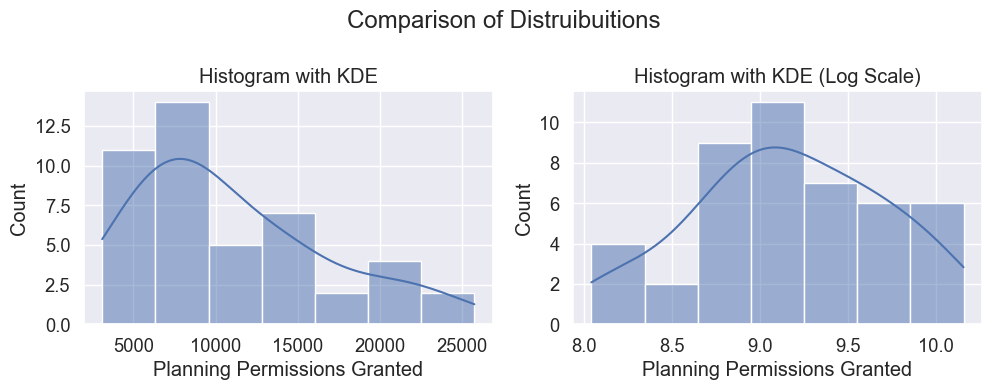

In [33]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram
sns.histplot(data=ireland_permits, x="Planning Permissions Granted", kde=True, ax=axs[0])
axs[0].set_title("Histogram with KDE")

# Plot the second histogram
sns.histplot(data=ireland_permits_log, x="Planning Permissions Granted", kde=True, ax=axs[1])
axs[1].set_title("Histogram with KDE (Log Scale)")

# Add a title to the overall figure
fig.suptitle("Comparison of Distruibuitions")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Using log values to perform  a parametrical Two-sample t-test 

The goal of this test is to "compare means between two distinct/independent groups" :   
(Planning PermissionsGranted/Permissions(sq mt) using the log values. 

For that, first need to check the means for each variable:


In [34]:
print(ireland_permits_log['Planning Permissions Granted'].mean(), 
      ireland_permits_log['Permissions Granted (sq m)'].mean())

9.158921370493259 8.078857030818808


In [35]:

# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=ireland_permits_log['Planning Permissions Granted'],
                b= ireland_permits_log['Permissions Granted (sq m)'], equal_var=True) 

# reject Ho with p-value < 0.05 very low = 1.04e-13


Ttest_indResult(statistic=8.803470586915827, pvalue=1.0420550718711557e-13)

In [36]:
# Perform the two-sample t-test with variances are not expected to be equal:
stats.ttest_ind(a=ireland_permits_log['Planning Permissions Granted'],
                b= ireland_permits_log['Permissions Granted (sq m)'], equal_var=False) 


Ttest_indResult(statistic=8.803470586915827, pvalue=1.1472411480772773e-13)


With the p-value of 1.14e-13, very close to 0 and quite below the alpha, there is a strong evidence to reject the null hypothesis. This suggests that there is a significant difference between the means of the two groups comparec above.

(Question raised: Would it be safe to assume that even if the original values were used for the test, before log transformation, would the p-value still be less then 0.05?, since their means remain the same? ) 

Although to confirm this theory, considering the original data does not follow a notmal distribution (hence the need to use a logaritmic scale) this hypotesis requires a non-parametrical test equivalent to a two-sample t-test, which in this case is the Mann-Whitney U test that can be performed on the original ireland_permits dataset.
Using the class tutorials, the Mann-Withney test does not require any prior assumptions of mean behaviours, so applying it generates the following result:

## Nonparametric test - Mann-Whitney U test

In [37]:
# performing non-para test Mann-Whitney U test
stats.mannwhitneyu(x=ireland_permits['Planning Permissions Granted'], 
                   y=ireland_permits['Permissions Granted (sq m)'], method="exact") 


#p-value still very close to 0 (1.64e-12) ==> strong evidence to reject the null hypothesis.


MannwhitneyuResult(statistic=1814.5, pvalue=1.6489593960852217e-12)


## Planning Permission from 2012 to 2022

In [38]:
# Filter dataset to show info from 2012:

# Convert the 'Year' index to a column
data.reset_index(inplace=True)

# Convert 'Year' to numeric value 
data['Year'] = pd.to_numeric(data['Year'])

# Filter the dataset to include only the years from 2012 to 2022
filtered_df = data[(data['Year'] >= 2012) & (data['Year'] <= 2022)]

# Set the 'Year' column as the new index
filtered_df.set_index('Year', inplace=True)

# Print the filtered dataset
display(filtered_df)

Planning Permissions Granted  Total Units of Permission Granted  \
Year                                                                    
2012                          3422                               5389   
2013                          3103                               6002   
2014                          3335                               6626   
2015                          3921                              10250   
2016                          4668                              12318   
2017                          5726                              15440   
2018                          6103                              19964   
2019                          6265                              19563   
2020                          5844                              17709   
2021                          7971                              16719   
2022                          7401                              17454   

      Permissions Granted (sq m)  Avg Area per Unit (sq m)  
Year                                                        
2012                        1110                     206.0  
2013                        1161                     193.5  
2014                        1261                     190.3  
2015                        1829                     178.4  
2016                        2105                     171.0  
2017                        2610                     169.1  
2018                        3166                     159.0  
2019                        3090                     158.0  
2020                        2732                     154.0  
2021                        2915                     174.0  
2022                        2915                     167.0

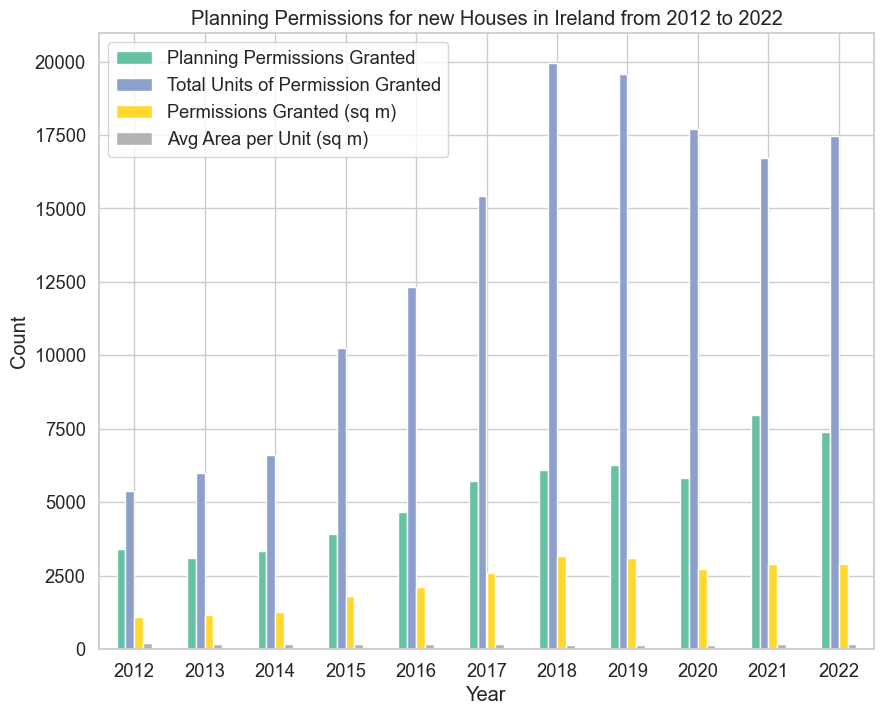

In [39]:
# Set sns style
sns.set_style("whitegrid")
# create line plot with permissions and units 

filtered_df.plot(kind='bar', cmap='Set2', figsize=(10, 8))

#Tried other color paletts but visibility was not optimal

# Get the current y-axis object
y_axis = plt.gca().yaxis

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Planning Permissions for new Houses in Ireland from 2012 to 2022')
plt.legend(loc='upper left')

# Rotate x-axis labels for better visibility at 45 degrees
plt.xticks(rotation=360)

# Show the plot
plt.show()


## Part II - Comparing Ireland to other countries in the Euro Area

### Importing csv files stored in the same directory 

Using the directory list, create a function to import datasets following class tutorials 

In [40]:
# Listing all the files in the folder
os.listdir("Data") 

['gdp(per_capita)_2022.csv',
 '.DS_Store',
 'Investment_by_asset:Dwellings.csv',
 'gdp(per_capita)_euro.csv',
 'Employment_by_activity:Construction.csv']

In [41]:
#create for loop to import csv files from the folder with less comands.
dataframes = []
folder_path = "Data/"

for file in os.listdir(folder_path):
    if file.endswith(".csv"): #consider only csv files, ignore .DS_Store
        file_path = os.path.join(folder_path, file)
        dataframes.append(pd.read_csv(file_path))

In [42]:
#check the lenght of the directory, how many files exist in the folder
len(dataframes)

4

### Gross domestic product (GDP) per capita in the Euro Area in US dollars - 2022



In [43]:
#define a variable name for each dataset to facilitate data manipulation
gdp_2022 = dataframes[0]

In [44]:
#cheack first 5 rows of first dataset

gdp_2022.info()
print(gdp_2022.shape)
print(gdp_2022.isnull().sum())
gdp_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    19 non-null     object 
 1   INDICATOR   19 non-null     object 
 2   SUBJECT     19 non-null     object 
 3   MEASURE     19 non-null     object 
 4   FREQUENCY   19 non-null     object 
 5   TIME        19 non-null     int64  
 6   Value       19 non-null     float64
 7   Flag Codes  9 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ KB
(19, 8)
LOCATION       0
INDICATOR      0
SUBJECT        0
MEASURE        0
FREQUENCY      0
TIME           0
Value          0
Flag Codes    10
dtype: int64


LOCATION INDICATOR SUBJECT  MEASURE FREQUENCY  TIME         Value Flag Codes
0      AUT       GDP     TOT  USD_CAP         A  2022  68774.881689        NaN
1      BEL       GDP     TOT  USD_CAP         A  2022  65818.301179          P
2      FIN       GDP     TOT  USD_CAP         A  2022  59808.219831        NaN
3      FRA       GDP     TOT  USD_CAP         A  2022  55698.406803          P
4      DEU       GDP     TOT  USD_CAP         A  2022  64099.171558          P

In [45]:
#check if order of files correspond with the directory list, testing if loop is working
dataframes[1].head()

LOCATION  INDICATOR   SUBJECT  MEASURE FREQUENCY  TIME      Value Flag Codes
0      GRC  GFCFASSET  DWELLING  PC_GFCF         A  2012  28.303621        NaN
1      GRC  GFCFASSET  DWELLING  PC_GFCF         A  2013  20.783450        NaN
2      GRC  GFCFASSET  DWELLING  PC_GFCF         A  2014   9.843368        NaN
3      GRC  GFCFASSET  DWELLING  PC_GFCF         A  2015   7.184208        NaN
4      GRC  GFCFASSET  DWELLING  PC_GFCF         A  2016   6.112797        NaN

both dataframes in the test display the same heading, so it can be assumed the other dfs will have the same since they were sourced, collected and stored in the same database. From the .info() function in the first dataset we get an output of 10 out of 19 obervations are missing the the "Flag Codes" feature, which confirming on the second df imported from the directory shows a similar pattern for this colum. Simmilarly, the feature "FREQUENCY" despite not displaying any missing values, have information that is not known or relevant for this analysis. 

So a new loop is created to drop these two columns from all common datasets in the shared directory.

In [46]:
# List of features to drop
features_to_drop = ['FREQUENCY', 'Flag Codes']

# could have dropped also the columsn: INDICATOR, SUBJECT, MEASURE since their categorical information wont be used
#however, before combinig all datasets with the relevant countries, 
#we need to keep these variables to change labels accordangly based specially on the measure units for each value.
#to avoid any mishandling of the numerical figures.

# Iterate over the dataframes
for df in dataframes:
    df.drop(features_to_drop, axis=1, inplace=True)


## Select the top 5 countries with highest gdp in the last year (2022) according to OECD: 

A dictionarywas created under the variable  location_mapping creating a link for each location code with its corresponding country name. Then use the map() function to create a new column called 'Country' in the sorted dataframe, adding the full countries' names to each location code, to make the top five countries plot more readable in the further lines. Next to display values from highest to lowest, a sorted_df was created to sort the descending values. 

In [47]:
def get_location_mapping():
    location_mapping = {
        'AUT': 'Austria',
        'BEL': 'Belgium',
        'FIN': 'Finland',
        'FRA': 'France',
        'DEU': 'Germany',
        'GRC': 'Greece',
        'IRL': 'Ireland',
        'ITA': 'Italy',
        'LUX': 'Luxembourg',
        'NLD': 'Netherlands',
        'PRT': 'Portugal',
        'SVK': 'Slovakia',
        'ESP': 'Spain',
        'EST': 'Estonia',
        'SVN': 'Slovenia',
        'LVA': 'Latvia',
        'LTU': 'Lithuania',
        'CYP': 'Cyprus',
        'MLT': 'Malta'
    }
    return location_mapping

# Call the function to retrieve the location mapping dictionary
location_mapping = get_location_mapping()

sorted_df = gdp_2022.sort_values('Value', ascending=False)  # Sort dataframe by 'Value' column in descending order

# Map location codes to country names using the mapping dictionary
sorted_df['Country'] = sorted_df['LOCATION'].map(location_mapping)

locations = sorted_df['Country']  # Use the 'Country' column for x-axis labels instead of 'LOCATION'
gdp_values = sorted_df['Value']

In [48]:
sorted_df.head()

LOCATION INDICATOR SUBJECT  MEASURE  TIME          Value      Country
8      LUX       GDP     TOT  USD_CAP  2022  143394.130003   Luxembourg
6      IRL       GDP     TOT  USD_CAP  2022  128343.445998      Ireland
9      NLD       GDP     TOT  USD_CAP  2022   70966.057612  Netherlands
0      AUT       GDP     TOT  USD_CAP  2022   68774.881689      Austria
1      BEL       GDP     TOT  USD_CAP  2022   65818.301179      Belgium

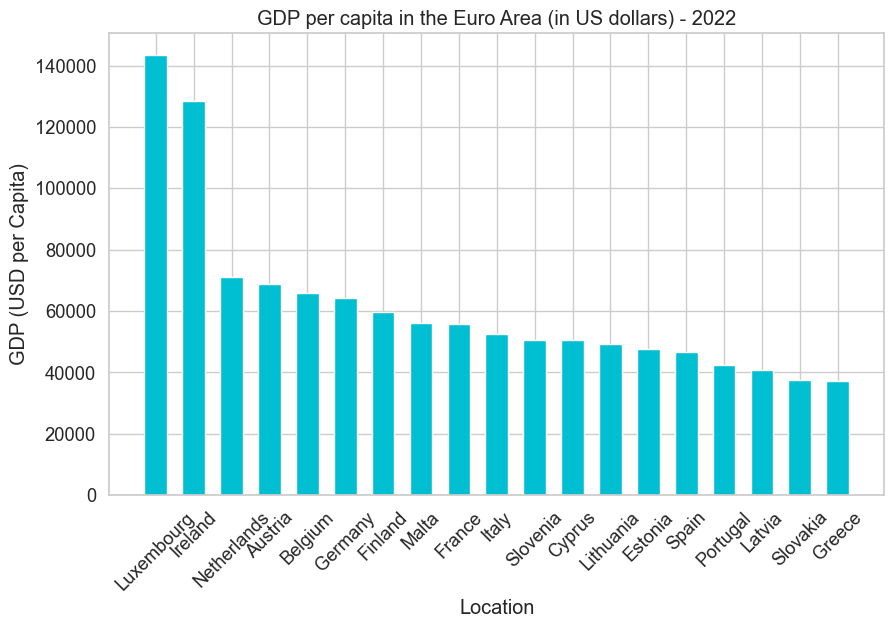

In [49]:
#create bar chart to display sorted_df using matplotlib
import matplotlib.pyplot as plt


# Set the figure size
plt.figure(figsize=(10, 6))  

#select specific columns to plot a bar chart
bars = plt.bar(locations, gdp_values, color='#00bfd3', width=0.6)

#set labels and title
plt.xlabel('Location')
plt.ylabel('GDP (USD per Capita)')
plt.title('GDP per capita in the Euro Area (in US dollars) - 2022')
plt.xticks(rotation=45)  




plt.show()

In [50]:
# create a bar chart using  plotly to compare both libraries
import plotly.graph_objects as go
import pandas as pd

# Set the figure size
fig3 = go.Figure()

# Create the bar chart
fig3.add_trace(go.Bar(
    x=locations,
    y=gdp_values,
    marker_color='#00bfd3',
    width=0.4,
    hovertemplate='Location: %{x}<br>GDP: %{y}'
))

# Set labels and title
fig3.update_layout(
    xaxis_title='Location',
    yaxis_title='GDP (USD per Capita)',
    title='GDP per capita in the Euro Area (in US dollars) - 2022',
    xaxis_tickangle=-45
)

fig3.show()

By comparing both plots, the plotly plots give a clearer font type, giving a smoother reading experience to the observers. also there is a better spacing between the bars where the country labes dont overlap. Colours were kept the same in both plots to better comparison with a change in the background from whitegrid to a grey scale in the second plot. Also, by default the y-axis labels were updated to a thousand scale (for example: 100k instead of 100000), which also makes comprehension of numerical figures less confusing.


From this plot we can select the top five countries which will be used for further analysis and models applications. 

However, first some Data cleaning and EDA will be performed trhough the use of pandas fucntions to check data types, shape and missing values, after selecting the 5 countries needed for the analysis.

### Investment by asset - Dwellings (excluding land)
#### OECD filtered data for Euro Area  from 2012 to 2022

    "Indicator filtered for investment in dwellings. Each asset is measured as *percentage of total gross fixed capital formation*. All OECD countries compile their data according to the 2008 System of National Accounts (SNA) (OECD, 2023)"

Citation: OECD (2023), Investment by asset (indicator). doi: 10.1787/8e5d47e6-en (Accessed on 16 May 2023)

In [51]:
# calling the dataframes function 
#and giving a name to the variable from the Data folder based on the position of the file in directory
invest = dataframes[1]

In [52]:
#print summarised information from second dataframe 
invest.info()
print(invest.shape)
print(invest.isnull().sum())
invest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   187 non-null    object 
 1   INDICATOR  187 non-null    object 
 2   SUBJECT    187 non-null    object 
 3   MEASURE    187 non-null    object 
 4   TIME       187 non-null    int64  
 5   Value      187 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.9+ KB
(187, 6)
LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
TIME         0
Value        0
dtype: int64


LOCATION  INDICATOR   SUBJECT  MEASURE  TIME      Value
0      GRC  GFCFASSET  DWELLING  PC_GFCF  2012  28.303621
1      GRC  GFCFASSET  DWELLING  PC_GFCF  2013  20.783450
2      GRC  GFCFASSET  DWELLING  PC_GFCF  2014   9.843368
3      GRC  GFCFASSET  DWELLING  PC_GFCF  2015   7.184208
4      GRC  GFCFASSET  DWELLING  PC_GFCF  2016   6.112797

In [53]:
# Based on GDP values, select top 5 countries for analysis by creating a function
def select_top_five(dataframe):
    # List of country codes to select
    countries = ["LUX", "IRL", "NLD", "AUT", "BEL"]

    # Filter the dataframe based on the country codes
    selection = dataframe[dataframe["LOCATION"].isin(countries)]

    return selection


#test the functionality of new function:
top_five_assets = select_top_five(invest)


# Print the filtered dataframe
display(top_five_assets.head())
print(top_five_assets.shape)
print(top_five_assets.describe())

LOCATION  INDICATOR   SUBJECT  MEASURE  TIME      Value
22      LUX  GFCFASSET  DWELLING  PC_GFCF  2012  15.061444
23      LUX  GFCFASSET  DWELLING  PC_GFCF  2013  18.296118
24      LUX  GFCFASSET  DWELLING  PC_GFCF  2014  18.897176
25      LUX  GFCFASSET  DWELLING  PC_GFCF  2015  22.011531
26      LUX  GFCFASSET  DWELLING  PC_GFCF  2016  23.464702

(55, 6)
              TIME      Value
count    55.000000  55.000000
mean   2017.000000  18.696864
std       3.191424   6.555328
min    2012.000000   4.226417
25%    2014.000000  16.961367
50%    2017.000000  19.776935
75%    2020.000000  24.257433
max    2022.000000  26.254866


In [54]:
#creating hierarchy for displaing countries by highest value to lowest based on GDP 
countries = ["LUX", "IRL", "NLD", "AUT", "BEL"]

# Create traces for each country
traces = []
for country in countries:
    country_data = top_five_assets[top_five_assets["LOCATION"] == country]
    trace = go.Scatter(
        x=country_data["TIME"],
        y=country_data["Value"],
        mode="lines+markers",
        name=country
    )
    traces.append(trace)

# Create the figure and set layout
figure = go.Figure(data=traces)
figure.update_layout(
    title="Investment by asset: Dwellings (% of GFCF),  Euro Area from 2012 to 2022",
    xaxis_title="Year",
    yaxis_title="Value"
)

# Display the figure
figure.show()

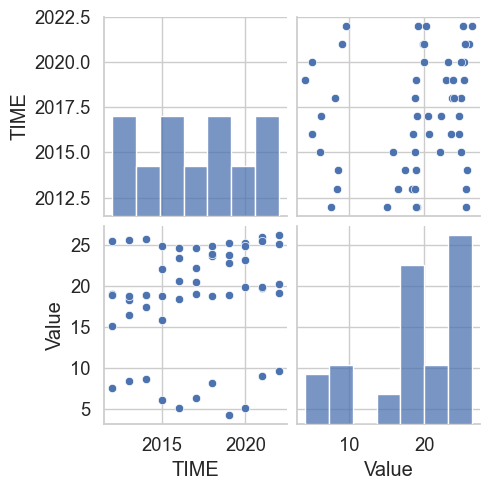

In [55]:
sns.pairplot(data=top_five_assets)

In [56]:
fig_map = px.choropleth(invest,
                    locations="LOCATION",
                    color="Value", 
                    # column by which to color-code
                    hover_name="LOCATION", 
                     animation_frame="TIME",
                    # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Sunset)#show different intesity of data
fig_map.update_layout(
    # add a title text for the plot
    title_text = 'Investment by asset: Dwellings (% of GFCF),  Euro Area from 2012 to 2022 ',
    geo_scope = 'europe' 
)
fig_map.show()



In [57]:
# List of features to drop
#features_to_drop2 = ['INDICATOR','SUBJECT','MEASURE']

# Iterate over the dataframes
#for df in dataframes:
 #   df.drop(features_to_drop, axis=1, inplace=True)


### GDP Euro Area from 2012 to 2022

<mark> <font > DIRECT CITATION FROM OECD: </font></mark> 

    "Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. While GDP is the single most important indicator to capture economic activity, it falls short of providing a suitable measure of people's material well-being for which alternative indicators may be more appropriate. This indicator is based on nominal GDP (also called GDP at current prices or GDP in value) and is available in different measures: US dollars and US dollars per capita (current PPPs). All OECD countries compile their data according to the 2008 System of National Accounts (SNA)." //This indicator is less suited for comparisons over time, as developments are not only caused by real growth, but also by changes in prices and PPPs.//
    
   OECD (2023), Gross domestic product (GDP) (indicator). doi: 10.1787/dc2f7aec-en (Accessed on 16 May 2023)

In [58]:
# create variable for df 3 in the Data folder
gdp_euro = dataframes[2]

In [59]:
print(gdp_euro.info())
gdp_euro.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   209 non-null    object 
 1   INDICATOR  209 non-null    object 
 2   SUBJECT    209 non-null    object 
 3   MEASURE    209 non-null    object 
 4   TIME       209 non-null    int64  
 5   Value      209 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ KB
None


LOCATION INDICATOR SUBJECT  MEASURE  TIME         Value
0      AUT       GDP     TOT  USD_CAP  2012  46477.655075
1      AUT       GDP     TOT  USD_CAP  2013  47936.677963
2      AUT       GDP     TOT  USD_CAP  2014  48813.534409
3      AUT       GDP     TOT  USD_CAP  2015  49942.056293
4      AUT       GDP     TOT  USD_CAP  2016  52665.087457

In [60]:
#creating hierarchy for displaing countries by highest value to lowest based on gdp
countries = ["LUX", "IRL", "NLD", "AUT", "BEL"]

# Create traces for each country
traces = []
for country in countries:
    country_data = gdp_euro[gdp_euro["LOCATION"] == country]
    trace = go.Scatter(
        x=country_data["TIME"],
        y=country_data["Value"],
        mode="lines+markers",
        name=country
    )
    traces.append(trace)

# Create the figure and set layout
figure = go.Figure(data=traces)
figure.update_layout(
    title="Comparison of GDP (in US dollars per capita) - 2012 to 2022",
    xaxis_title="Year",
    yaxis_title="Value"
)

# Display the figure
figure.show()

In [61]:
# Calling select_top_five() function:
top_five_gdp = select_top_five(gdp_euro)


print(top_five_gdp.info())
print(top_five_gdp.isnull().sum())

top_five_gdp.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 109
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   55 non-null     object 
 1   INDICATOR  55 non-null     object 
 2   SUBJECT    55 non-null     object 
 3   MEASURE    55 non-null     object 
 4   TIME       55 non-null     int64  
 5   Value      55 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ KB
None
LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
TIME         0
Value        0
dtype: int64


LOCATION INDICATOR SUBJECT  MEASURE  TIME          Value
73       IRL       GDP     TOT  USD_CAP  2019   89846.694028
106      NLD       GDP     TOT  USD_CAP  2019   60207.995700
90       LUX       GDP     TOT  USD_CAP  2014  104917.945675
98       LUX       GDP     TOT  USD_CAP  2022  143394.130003
8        AUT       GDP     TOT  USD_CAP  2020   57258.818295

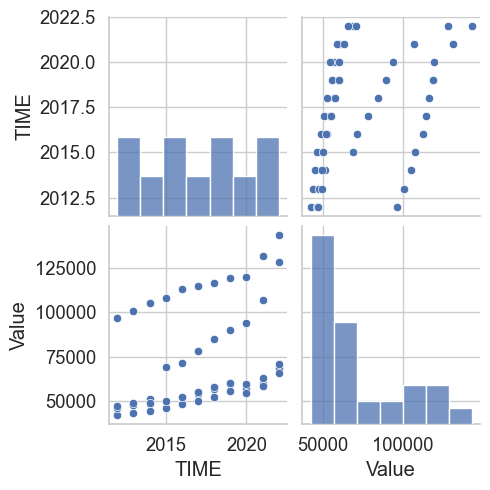

In [62]:
sns.pairplot(data=top_five_gdp)

In [63]:
fig_gdp = px.choropleth(gdp_euro,
                    locations="LOCATION",
                    color="Value", 
                    # column by which to color-code
                    hover_name="LOCATION", 
                     animation_frame="TIME",
                    # column to display in hover information
                    color_continuous_scale=px.colors.sequential.matter)#show different intesity of data
fig_gdp.update_layout(
    # add a title text for the plot
    title_text = 'GDP (in US Dollars per capita) in  Euro Area from 2012 to 2022 ',
    geo_scope = 'europe' 
)
fig_gdp.show()


created a series of maps, one for each dataframe to investigate the behavious of different variables but also as an exercise to see how the colors chosen actually transmit the information aimed and how different color schemes help to understand the change in values over the years. By choosing a darker color at the end of the scale the goal is to display higher values in a darker colour, while lowest values on a lighter shade for better comprehension.

*Built-In Sequential Color scales
A collection of predefined sequential colorscales is provided in the plotly.colors.sequential module. Sequential color scales are appropriate for most continuous data, but in some cases it can be helpful to use a diverging or cyclical color scale (see below).* (Plotly, 2023)




### Employment by activity: Construction 

Employment by activity
Construction, Thousand persons, 2022
Source: Labour: Labour market statistics


Definition:
Employment by industry is broken down by agriculture, construction, industry including construction, manufacturing and services activities. This indicator is seasonally adjusted and it is measured in thousands of people.

OECD (2023), Employment by activity (indicator). doi: 10.1787/a258bb52-en (Accessed on 20 May 2023)


In [64]:
construct_employ = dataframes[3]

In [65]:
print(construct_employ.info())
construct_employ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   186 non-null    object 
 1   INDICATOR  186 non-null    object 
 2   SUBJECT    186 non-null    object 
 3   MEASURE    186 non-null    object 
 4   TIME       186 non-null    int64  
 5   Value      186 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ KB
None


LOCATION INDICATOR SUBJECT   MEASURE  TIME    Value
0      AUT  EMPINDUS  CONSTR  THND_PER  2012  368.425
1      AUT  EMPINDUS  CONSTR  THND_PER  2013  364.250
2      AUT  EMPINDUS  CONSTR  THND_PER  2014  357.425
3      AUT  EMPINDUS  CONSTR  THND_PER  2015  347.850
4      AUT  EMPINDUS  CONSTR  THND_PER  2016  350.100

In [66]:
#display a random sample of the dataset 
construct_employ.sample(10)

LOCATION INDICATOR SUBJECT   MEASURE  TIME     Value
70       IRL  EMPINDUS  CONSTR  THND_PER  2017   128.675
26       FIN  EMPINDUS  CONSTR  THND_PER  2016   178.225
124      SVK  EMPINDUS  CONSTR  THND_PER  2016   229.425
15       BEL  EMPINDUS  CONSTR  THND_PER  2016   335.050
102      NLD  EMPINDUS  CONSTR  THND_PER  2016   397.575
108      NLD  EMPINDUS  CONSTR  THND_PER  2022   414.750
72       IRL  EMPINDUS  CONSTR  THND_PER  2019   146.975
43       FRA  EMPINDUS  CONSTR  THND_PER  2022  1838.625
65       IRL  EMPINDUS  CONSTR  THND_PER  2012    83.400
138      ESP  EMPINDUS  CONSTR  THND_PER  2019  1277.900

In [67]:
# Calling select_top_five() function:
top_five_employ = select_top_five(construct_employ)


print(top_five_employ.info())
print(top_five_employ.isnull().sum())

top_five_employ.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 108
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   55 non-null     object 
 1   INDICATOR  55 non-null     object 
 2   SUBJECT    55 non-null     object 
 3   MEASURE    55 non-null     object 
 4   TIME       55 non-null     int64  
 5   Value      55 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ KB
None
LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
TIME         0
Value        0
dtype: int64


LOCATION INDICATOR SUBJECT   MEASURE  TIME    Value
74      IRL  EMPINDUS  CONSTR  THND_PER  2021  138.600
15      BEL  EMPINDUS  CONSTR  THND_PER  2016  335.050
70      IRL  EMPINDUS  CONSTR  THND_PER  2017  128.675
12      BEL  EMPINDUS  CONSTR  THND_PER  2013  329.650
65      IRL  EMPINDUS  CONSTR  THND_PER  2012   83.400

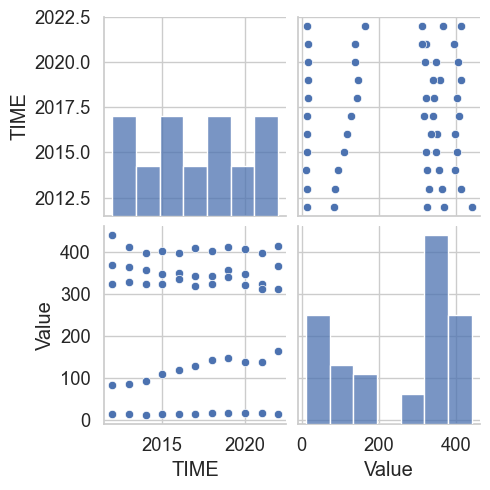

In [68]:
sns.pairplot(data=top_five_employ)
# from this pairplot, it suggests the values have a low level of correlation.
#Which makes sense considenring each category is independednt of one another, in terms of data from different locations.

In [69]:
#obtain statistical figures
top_five_employ.describe()

TIME       Value
count    55.000000   55.000000
mean   2017.000000  244.380000
std       3.191424  152.002159
min    2012.000000   11.175000
25%    2014.000000  101.275000
50%    2017.000000  323.375000
75%    2020.000000  361.050000
max    2022.000000  441.450000

In [70]:
fig_emp = px.choropleth(construct_employ,
                    locations="LOCATION",
                    color="Value", 
                    # column by which to color-code
                    hover_name="LOCATION", 
                     animation_frame="TIME",
                    # column to display in hover information
                    color_continuous_scale=px.colors.sequential.deep)#show different intesity of data
fig_emp.update_layout(
    # add a title text for the plot
    title_text = 'Employment rates by activity: Construction (in thousands of persons)',
    geo_scope = 'europe' 
)
fig_emp.show()


In [71]:
countries = ["LUX", "IRL", "NLD", "AUT", "BEL"]

# Create traces for each country
traces = []
for country in countries:
    country_data = top_five_employ[top_five_employ["LOCATION"] == country]
    trace = go.Scatter(
        x=country_data["TIME"],
        y=country_data["Value"],
        mode="lines+markers",
        name=country
    )
    traces.append(trace)

# Create the figure and set layout
figure = go.Figure(data=traces)
figure.update_layout(
    title="Comparison of Employment in Construction activity (thousands of people) - From 2012 to 2022",
    xaxis_title="Year",
    yaxis_title="Value"
)

# Display the figure
figure.show()

In [72]:
fig = px.choropleth(construct_employ, locations="LOCATION",
                    color="Value", 
                    hover_name="LOCATION", 
                    # column to add to hover information
                    animation_frame="TIME", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.tempo) #higher values > darker in colour scale
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Employment rates by activity: Construction (in thousands of people)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) 
    # by default, projection type is set to 'equirectangular'
)
fig.show()


## Map of Employment rates in Construction (in thousands of persons) in Euro Area
Period: 2012 to 2022
L


In [73]:
fig_ec = px.choropleth(construct_employ,
                    locations="LOCATION",
                    color="Value", 
                    # column by which to color-code
                    hover_name="LOCATION", 
                     animation_frame="TIME",
                    # column to display in hover information
                    color_continuous_scale=px.colors.sequential.deep)#show different intesity of data
fig_ec.update_layout(
    # add a title text for the plot
    title_text = 'Euro Area: Employment rates by activity - Construction (in thousands of persons)',
    geo_scope = 'europe' 
)
fig_ec.show()


## Combine the top five dataframes into one:

top_five_gdp + top_five_employ + top_five_invest

first select the most important features and rename them:

- change "TIME" to 'Year' and set this as index
- rename columns to show value(measure) in same label
- drop categorical features that are not relevant 

In [74]:
#renaming value features for each dataset to facilitate merging them together
top_five_assets = top_five_assets.rename(columns={"Value": "Investment in Dwellings(%_GFCF)", 
                                                 "TIME":"Year",
                                                 "LOCATION":"Country"})
top_five_gdp = top_five_gdp.rename(columns={"Value": "GDP(USD_cap)",  "TIME":"Year",
                                                 "LOCATION":"Country"})
top_five_employ = top_five_employ.rename(columns={"Value": "Construction(thnd_per)", "TIME":"Year",
                                                 "LOCATION":"Country"})


In [75]:
#List of features to drop

def drop_duplicate_columns(datasets, features_to_drop):
    for dataset in datasets:
        dataset.drop(features_to_drop, axis=1, inplace=True)

# Example usage
datasets = [top_five_assets, top_five_gdp, top_five_employ]  # List of datasets
features_to_drop2 = ['INDICATOR', 'SUBJECT', 'MEASURE']

drop_duplicate_columns(datasets, features_to_drop2)

df.drop(features_to_drop2, axis=1, inplace=True)

In [76]:
#check datasets
top_five_assets.head()

Country  Year  Investment in Dwellings(%_GFCF)
22     LUX  2012                        15.061444
23     LUX  2013                        18.296118
24     LUX  2014                        18.897176
25     LUX  2015                        22.011531
26     LUX  2016                        23.464702

In [77]:
top_five_gdp.head()

Country  Year  GDP(USD_cap)
0     AUT  2012  46477.655075
1     AUT  2013  47936.677963
2     AUT  2014  48813.534409
3     AUT  2015  49942.056293
4     AUT  2016  52665.087457

In [78]:
top_five_employ.head()

Country  Year  Construction(thnd_per)
0     AUT  2012                 368.425
1     AUT  2013                 364.250
2     AUT  2014                 357.425
3     AUT  2015                 347.850
4     AUT  2016                 350.100

In [79]:
#sorted_df = gdp_2022.sort_values('Value', ascending=False)  # Sort dataframe by 'Value' column in descending order

# Map location codes to country names using the mapping dictionary
#sorted_df['Country'] = sorted_df['LOCATION'].map(location_mapping)

#locations = sorted_df['Country']  # Use the 'Country' column for x-axis labels instead of 'LOCATION'
#gdp_values = sorted_df['Value']

In [80]:
import pandas as pd

# Mergins dfs to mantain same TIME and LOCATION features, adding just the renamed values:
merged_df = pd.merge(top_five_gdp, top_five_employ, on=['Year', 'Country'], how='left')
merged_df = pd.merge(merged_df, top_five_assets, on=['Year', 'Country'], how='left')

# Example usage
display(merged_df.head())
print(merged_df.shape)
print(merged_df.info())

Country  Year  GDP(USD_cap)  Construction(thnd_per)  \
0     AUT  2012  46477.655075                 368.425   
1     AUT  2013  47936.677963                 364.250   
2     AUT  2014  48813.534409                 357.425   
3     AUT  2015  49942.056293                 347.850   
4     AUT  2016  52665.087457                 350.100   

   Investment in Dwellings(%_GFCF)  
0                        19.023270  
1                        18.810391  
2                        18.900321  
3                        18.760208  
4                        18.463327

(55, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          55 non-null     object 
 1   Year                             55 non-null     int64  
 2   GDP(USD_cap)                     55 non-null     float64
 3   Construction(thnd_per)           55 non-null     float64
 4   Investment in Dwellings(%_GFCF)  55 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.6+ KB
None


In [81]:
merged_df.head(30)

Country  Year  GDP(USD_cap)  Construction(thnd_per)  \
0      AUT  2012  46477.655075                 368.425   
1      AUT  2013  47936.677963                 364.250   
2      AUT  2014  48813.534409                 357.425   
3      AUT  2015  49942.056293                 347.850   
4      AUT  2016  52665.087457                 350.100   
5      AUT  2017  54188.360666                 342.025   
6      AUT  2018  56956.110562                 343.675   
7      AUT  2019  59719.612013                 357.850   
8      AUT  2020  57258.818295                 348.300   
9      AUT  2021  59991.439846                 323.875   
10     AUT  2022  68774.881689                 367.000   
11     BEL  2012  42290.477674                 324.850   
12     BEL  2013  43672.712292                 329.650   
13     BEL  2014  44929.933328                 325.050   
14     BEL  2015  46201.685891                 323.250   
15     BEL  2016  48599.202676                 335.050   
16     BEL  2017  50442.947518                 318.050   
17     BEL  2018  52530.841510                 323.375   
18     BEL  2019  55804.713631                 340.350   
19     BEL  2020  54544.419240                 320.675   
20     BEL  2021  58845.530928                 311.875   
21     BEL  2022  65818.301179                 311.425   
22     IRL  2012  46409.672305                  83.400   
23     IRL  2013  47882.067704                  85.925   
24     IRL  2014  51195.980951                  93.775   
25     IRL  2015  69165.900652                 108.775   
26     IRL  2016  71633.128805                 118.600   
27     IRL  2017  78051.654251                 128.675   
28     IRL  2018  84824.335541                 143.375   
29     IRL  2019  89846.694028                 146.975   

    Investment in Dwellings(%_GFCF)  
0                         19.023270  
1                         18.810391  
2                         18.900321  
3                         18.760208  
4                         18.463327  
5                         18.970581  
6                         18.717970  
7                         18.871211  
8                         19.875251  
9                         19.874367  
10                        20.202475  
11                        25.529417  
12                        25.561309  
13                        25.685493  
14                        24.864535  
15                        24.606699  
16                        24.603624  
17                        24.829793  
18                        25.220795  
19                        25.255405  
20                        25.922786  
21                        26.254866  
22                         7.554522  
23                         8.459331  
24                         8.588170  
25                         6.126625  
26                         5.058166  
27                         6.335418  
28                         8.190615  
29                         4.226417

### Saving merged_df to a separate json file 

In case this data needs to be accessed on separate ocasion

In [82]:
# sotraging the merged values on a json file so we can retrieve in other projects and/or sections:
merged_df.to_json('merged_df.json')

In [83]:
# Pivoting, using time as index, location as new columns and assigning the values to the right quarter. 
pivot_df = merged_df.pivot(index='Year', columns='Country', values=['GDP(USD_cap)','Construction(thnd_per)',
                                                                     'Investment in Dwellings(%_GFCF)'])
display(pivot_df) # Dsplays the dataset, to check no only the command but also the new shape.

GDP(USD_cap)                                              \
Country           AUT           BEL            IRL            LUX   
Year                                                                
2012     46477.655075  42290.477674   46409.672305   96535.745828   
2013     47936.677963  43672.712292   47882.067704  100561.366405   
2014     48813.534409  44929.933328   51195.980951  104917.945675   
2015     49942.056293  46201.685891   69165.900652  107898.304236   
2016     52665.087457  48599.202676   71633.128805  112955.470175   
2017     54188.360666  50442.947518   78051.654251  114862.528755   
2018     56956.110562  52530.841510   84824.335541  116334.724739   
2019     59719.612013  55804.713631   89846.694028  119253.372812   
2020     57258.818295  54544.419240   94037.963161  119882.982023   
2021     59991.439846  58845.530928  106879.157958  131311.164821   
2022     68774.881689  65818.301179  128343.445998  143394.130003   

                      Construction(thnd_per)                            \
Country           NLD                    AUT      BEL      IRL     LUX   
Year                                                                     
2012     47271.968226                368.425  324.850   83.400  14.750   
2013     49242.786711                364.250  329.650   85.925  13.900   
2014     49233.230349                357.425  325.050   93.775  11.175   
2015     50288.352815                347.850  323.250  108.775  15.000   
2016     52289.404292                350.100  335.050  118.600  14.725   
2017     55089.581430                342.025  318.050  128.675  13.900   
2018     57825.399708                343.675  323.375  143.375  15.825   
2019     60207.995700                357.850  340.350  146.975  16.350   
2020     59821.266235                348.300  320.675  137.175  15.700   
2021     63369.162705                323.875  311.875  138.600  15.750   
2022     70966.057612                367.000  311.425  165.200  14.700   

                 Investment in Dwellings(%_GFCF)                       \
Country      NLD                             AUT        BEL       IRL   
Year                                                                    
2012     441.450                       19.023270  25.529417  7.554522   
2013     412.825                       18.810391  25.561309  8.459331   
2014     397.500                       18.900321  25.685493  8.588170   
2015     402.600                       18.760208  24.864535  6.126625   
2016     397.575                       18.463327  24.606699  5.058166   
2017     408.675                       18.970581  24.603624  6.335418   
2018     402.750                       18.717970  24.829793  8.190615   
2019     412.550                       18.871211  25.220795  4.226417   
2020     406.950                       19.875251  25.255405  5.049045   
2021     396.650                       19.874367  25.922786  9.020828   
2022     414.750                       20.202475  26.254866  9.611396   

                               
Country        LUX        NLD  
Year                           
2012     15.061444  18.903718  
2013     18.296118  16.468570  
2014     18.897176  17.454164  
2015     22.011531  15.817561  
2016     23.464702  20.607729  
2017     20.458679  22.157799  
2018     23.613309  23.911242  
2019     22.850332  23.761631  
2020     23.173345  24.903867  
2021     19.776935  25.433745  
2022     19.129179  25.150146

In [84]:
pivot_df.describe()

GDP(USD_cap)                                              \
Country           AUT           BEL            IRL            LUX   
count       11.000000     11.000000      11.000000      11.000000   
mean     54793.112206  51243.705988   78933.636487  115264.339588   
std       6617.257608   7169.109641   25583.367573   13494.117220   
min      46477.655075  42290.477674   46409.672305   96535.745828   
25%      49377.795351  45565.809610   60180.940801  106408.124955   
50%      54188.360666  50442.947518   78051.654251  114862.528755   
75%      58489.215154  55174.566436   91942.328594  119568.177418   
max      68774.881689  65818.301179  128343.445998  143394.130003   

                      Construction(thnd_per)                          \
Country           NLD                    AUT         BEL         IRL   
count       11.000000              11.000000   11.000000   11.000000   
mean     55964.109617             351.888636  323.963636  122.770455   
std       7271.606393              13.048771    8.807471   26.954081   
min      47271.968226             323.875000  311.425000   83.400000   
25%      49765.569763             345.762500  319.362500  101.275000   
50%      55089.581430             350.100000  323.375000  128.675000   
75%      60014.630968             361.050000  327.350000  140.987500   
max      70966.057612             368.425000  340.350000  165.200000   

                               Investment in Dwellings(%_GFCF)             \
Country        LUX         NLD                             AUT        BEL   
count    11.000000   11.000000                       11.000000  11.000000   
mean     14.706818  408.570455                       19.133579  25.303156   
std       1.410279   12.692132                        0.571768   0.543473   
min      11.175000  396.650000                       18.463327  24.603624   
25%      14.300000  400.087500                       18.785299  24.847164   
50%      14.750000  406.950000                       18.900321  25.255405   
75%      15.725000  412.687500                       19.448818  25.623401   
max      16.350000  441.450000                       20.202475  26.254866   

                                          
Country        IRL        LUX        NLD  
count    11.000000  11.000000  11.000000  
mean      7.110958  20.612068  21.324561  
std       1.833545   2.696428   3.645798  
min       4.226417  15.061444  15.817561  
25%       5.592396  19.013178  18.178941  
50%       7.554522  20.458679  22.157799  
75%       8.523751  23.011838  24.407554  
max       9.611396  23.613309  25.433745

In [85]:
# Displayng the merged_df in a plot 
import plotly.express as px

# Create bar plot
fig = px.bar(merged_df, x="Country", y=["GDP(USD_cap)", "Construction(thnd_per)", "Investment in Dwellings(%_GFCF)"],
             color_discrete_sequence=px.colors.qualitative.Plotly,
             barmode="group")# setting barmode="group", the bars for each variable will be displayed side by side, 
            #allowing for easier visual comparison between the variables.

# Update layout
fig.update_layout(
    title="Comparison of GDP, Construction, and Investment Per Country",
    xaxis_title="Country",
    yaxis_title="Value"
)

# Show the plot
fig.show()

tried to add all features in the same plot (with subplots function but visibility was confusing, too polluted)
decided to use only 2 variables for this comparison: gdp and employment by construction

In [86]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Select values from df to be used in the dropdown menu later
locations = merged_df['Country'].unique()

# Create a subplot with three y-axes
figA = make_subplots(specs=[[{"secondary_y": True}]])

# Create traces for each location and feature
traces = []
location_mapping = get_location_mapping()
for location in locations:
    location_name = location_mapping.get(location, location)
    location_data = merged_df[merged_df['Country'] == location]
    traces.append(go.Scatter(
        x=location_data['Year'],
        y=location_data['GDP(USD_cap)'],
        mode='lines',
        name=f'{location_name} - GDP(USD_cap)',
        yaxis='y1'
    ))
    traces.append(go.Scatter(
        x=location_data['Year'],
        y=location_data['Construction(thnd_per)'],
        mode='lines',
        name=f'{location_name} - Construction(thnd_per)',
        yaxis='y2'
    ))


# Add traces to the subplot
for trace in traces:
    figA.add_trace(trace)

# Set y-axis labels and title
figA.update_layout(
    yaxis=dict(title='GDP (USD per capita)'),
    yaxis2=dict(title='Construction (thousand per year)', anchor='x', overlaying='y', side='right'),
    xaxis=dict(title='Year'),
    title='Values by Location - Comparing GDP with Employment rate in Construction over the years ',
    annotations=[
        dict(
            x=0.5,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Select the country to see values',
            showarrow=False,
            font=dict(size=12)
        )
    ]
)


# Create the dropdown menu
buttons = []
for location in locations:
    location_name = location_mapping.get(location, location)
    visible = [False] * len(traces)
    for i, trace in enumerate(traces):
        if trace.name.startswith(location_name):
            visible[i] = True
    buttons.append(dict(
        label=location_name,
        method='update',
        args=[{'visible': visible}]
    ))

# Add the dropdown menu to the layout
figA.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction='down',
        pad={'r': 10, 't': 10},
        showactive=True,
        x=0.05,
        xanchor='left',
        y=1.1,
        yanchor='top'
    )]
)

# Show the figure
figA.show()
#by selecting each country, GDP is in color blue, Construction in red, for contrast
#

The merged_df did not have the expected result, the solution found was to pivot each dataframe separately, having the data for each country ranked by year and with that data the Hypotesis Testing will be applied

In [87]:
gdp_pivot = top_five_gdp.pivot(index='Year', columns='Country', values='GDP(USD_cap)')

display(gdp_pivot)
print(gdp_pivot.info())

Country           AUT           BEL            IRL            LUX  \
Year                                                                
2012     46477.655075  42290.477674   46409.672305   96535.745828   
2013     47936.677963  43672.712292   47882.067704  100561.366405   
2014     48813.534409  44929.933328   51195.980951  104917.945675   
2015     49942.056293  46201.685891   69165.900652  107898.304236   
2016     52665.087457  48599.202676   71633.128805  112955.470175   
2017     54188.360666  50442.947518   78051.654251  114862.528755   
2018     56956.110562  52530.841510   84824.335541  116334.724739   
2019     59719.612013  55804.713631   89846.694028  119253.372812   
2020     57258.818295  54544.419240   94037.963161  119882.982023   
2021     59991.439846  58845.530928  106879.157958  131311.164821   
2022     68774.881689  65818.301179  128343.445998  143394.130003   

Country           NLD  
Year                   
2012     47271.968226  
2013     49242.786711  
2014     49233.230349  
2015     50288.352815  
2016     52289.404292  
2017     55089.581430  
2018     57825.399708  
2019     60207.995700  
2020     59821.266235  
2021     63369.162705  
2022     70966.057612

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2012 to 2022
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AUT     11 non-null     float64
 1   BEL     11 non-null     float64
 2   IRL     11 non-null     float64
 3   LUX     11 non-null     float64
 4   NLD     11 non-null     float64
dtypes: float64(5)
memory usage: 528.0 bytes
None


In [88]:
gdp_pivot.describe()

Country           AUT           BEL            IRL            LUX  \
count       11.000000     11.000000      11.000000      11.000000   
mean     54793.112206  51243.705988   78933.636487  115264.339588   
std       6617.257608   7169.109641   25583.367573   13494.117220   
min      46477.655075  42290.477674   46409.672305   96535.745828   
25%      49377.795351  45565.809610   60180.940801  106408.124955   
50%      54188.360666  50442.947518   78051.654251  114862.528755   
75%      58489.215154  55174.566436   91942.328594  119568.177418   
max      68774.881689  65818.301179  128343.445998  143394.130003   

Country           NLD  
count       11.000000  
mean     55964.109617  
std       7271.606393  
min      47271.968226  
25%      49765.569763  
50%      55089.581430  
75%      60014.630968  
max      70966.057612

## Distribution of Employment in Construction in Euro Area


In [89]:
#pivot employment by construction sector
employ_pivot = top_five_employ.pivot(index='Year', columns='Country', values='Construction(thnd_per)')

display(employ_pivot)
print(employ_pivot.info())
#countries realigned by alphabetical order (default)

Country      AUT      BEL      IRL     LUX      NLD
Year                                               
2012     368.425  324.850   83.400  14.750  441.450
2013     364.250  329.650   85.925  13.900  412.825
2014     357.425  325.050   93.775  11.175  397.500
2015     347.850  323.250  108.775  15.000  402.600
2016     350.100  335.050  118.600  14.725  397.575
2017     342.025  318.050  128.675  13.900  408.675
2018     343.675  323.375  143.375  15.825  402.750
2019     357.850  340.350  146.975  16.350  412.550
2020     348.300  320.675  137.175  15.700  406.950
2021     323.875  311.875  138.600  15.750  396.650
2022     367.000  311.425  165.200  14.700  414.750

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2012 to 2022
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AUT     11 non-null     float64
 1   BEL     11 non-null     float64
 2   IRL     11 non-null     float64
 3   LUX     11 non-null     float64
 4   NLD     11 non-null     float64
dtypes: float64(5)
memory usage: 528.0 bytes
None


In [90]:
employ_pivot.describe()


Country         AUT         BEL         IRL        LUX         NLD
count     11.000000   11.000000   11.000000  11.000000   11.000000
mean     351.888636  323.963636  122.770455  14.706818  408.570455
std       13.048771    8.807471   26.954081   1.410279   12.692132
min      323.875000  311.425000   83.400000  11.175000  396.650000
25%      345.762500  319.362500  101.275000  14.300000  400.087500
50%      350.100000  323.375000  128.675000  14.750000  406.950000
75%      361.050000  327.350000  140.987500  15.725000  412.687500
max      368.425000  340.350000  165.200000  16.350000  441.450000

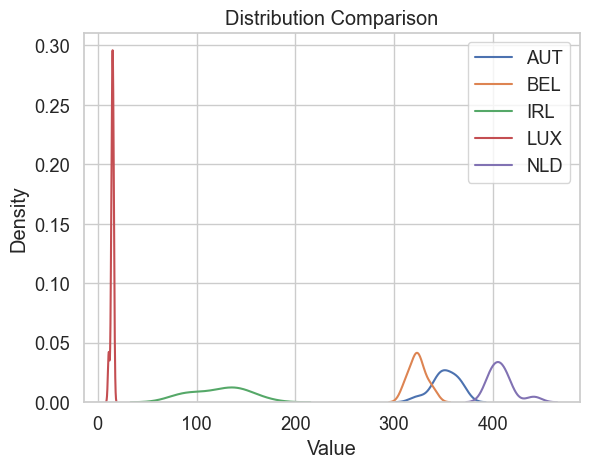

In [91]:
# Create KDE plots for each country
for column in employ_pivot.columns:
    sns.kdeplot(employ_pivot[column], label=column)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Comparison')
plt.legend()
plt.show()

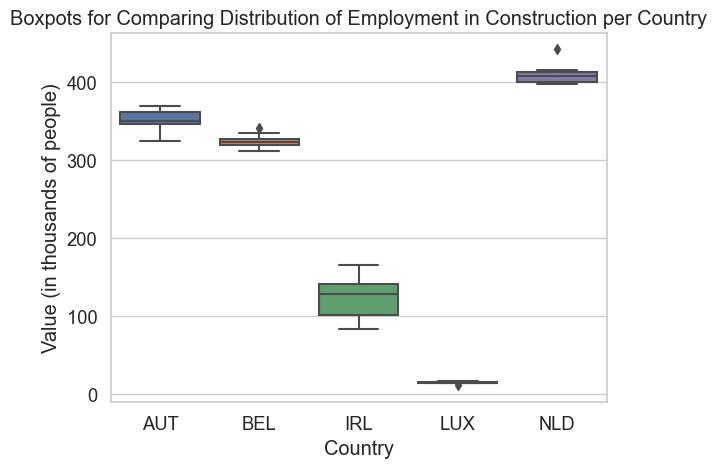

In [92]:
# tried also to create violin plots and a kde plot for each country
# Create box plots for each country
sns.boxplot(data=employ_pivot)
plt.xlabel('Country')
plt.ylabel('Value (in thousands of people)')
plt.title('Boxpots for Comparing Distribution of Employment in Construction per Country')
plt.show()

### Checking the Distribution between countries

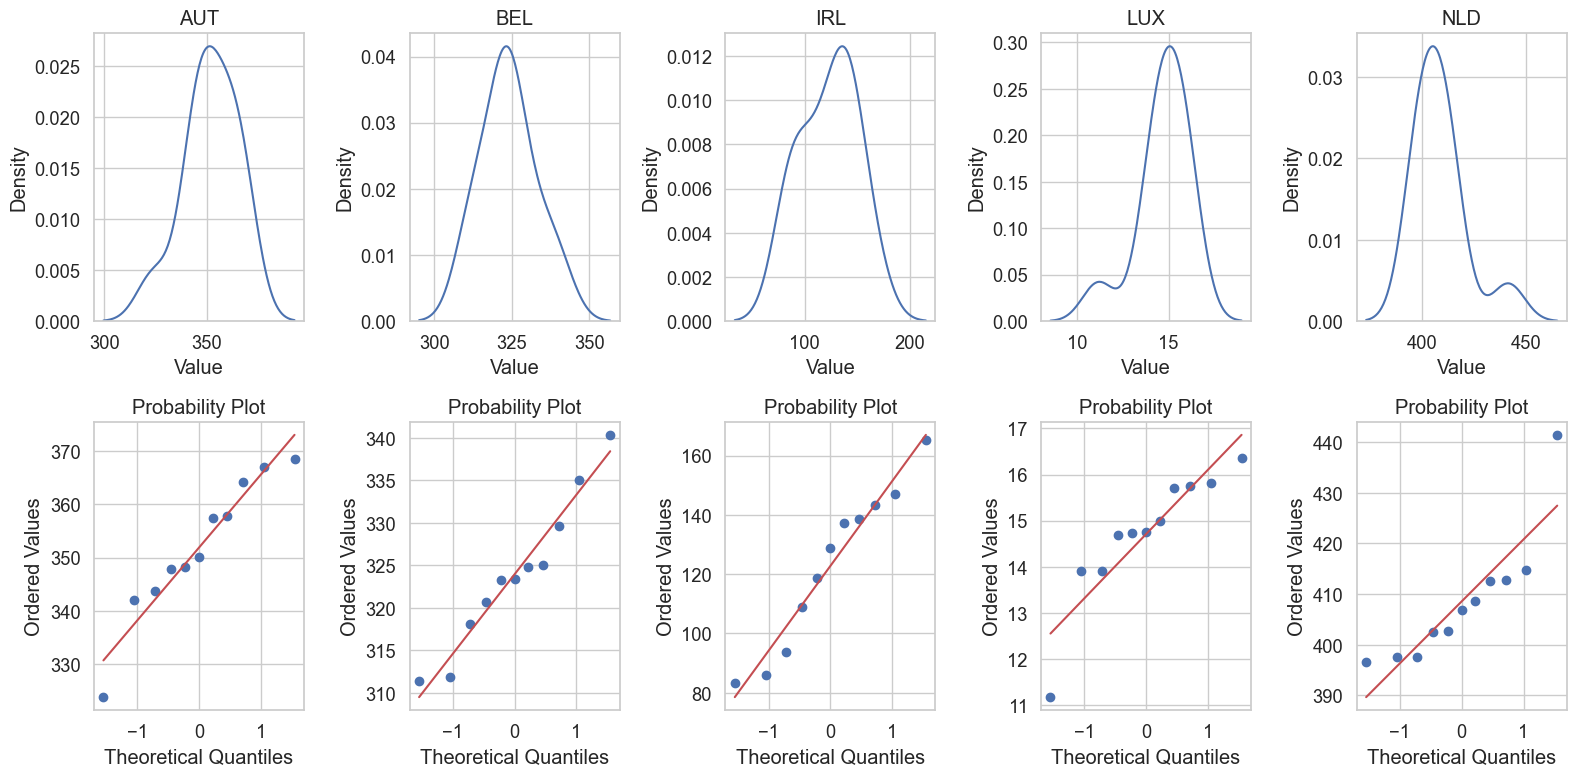

In [93]:
# Create subplots with 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(16, 8))

# Iterate over each country and plot the KDE density plot and probability plot
for i, country in enumerate(employ_pivot.columns):
    # Plot the KDE density plot in the top row
    sns.kdeplot(data=employ_pivot[country], ax=axs[0, i])
    axs[0, i].set_xlabel('Value')
    axs[0, i].set_ylabel('Density')
    axs[0, i].set_title(country)
    
    # Plot the probability plot in the bottom row
    stats.probplot(employ_pivot[country], dist='norm', plot=axs[1, i])
    axs[1, i].set_xlabel('Theoretical Quantiles')
    axs[1, i].set_ylabel('Ordered Values')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [94]:
# Perform Shapiro-Wilk test to check distribuitions:

for col in employ_pivot.columns:
    shapiro_test = shapiro(employ_pivot[col])
    print(f'Shapiro-Wilk Test for {col}: statistic={stat}, p-value={p_value}')
  

Shapiro-Wilk Test for AUT: statistic=0.967111349105835, p-value=0.22680149972438812
Shapiro-Wilk Test for BEL: statistic=0.967111349105835, p-value=0.22680149972438812
Shapiro-Wilk Test for IRL: statistic=0.967111349105835, p-value=0.22680149972438812
Shapiro-Wilk Test for LUX: statistic=0.967111349105835, p-value=0.22680149972438812
Shapiro-Wilk Test for NLD: statistic=0.967111349105835, p-value=0.22680149972438812


The first Shapiro-Wilk test resulted in a same p-value for all features, however in the distribuition plots above, they display a skweness for LUX (skewed to left) and NLD (right skwed) so it cannot be assumed that all countries follow a normal distrivbuition.
So i performed the test again with a few additions to the code, with a different for loop path:

In [95]:
# Apply the Shapiro-Wilk test to each column
results = []
for column in employ_pivot.columns:
    stat, p_value = shapiro(employ_pivot[column])
    results.append((column, stat, p_value))

# Create a DataFrame with the test results
test_results = pd.DataFrame(results, columns=['Variable', 'Test Statistic', 'P-value'])

# Print to check the test results (they must be distint from one another)
print(test_results)

  Variable  Test Statistic   P-value
0      AUT        0.937240  0.488612
1      BEL        0.956662  0.729475
2      IRL        0.944284  0.572085
3      LUX        0.852163  0.045541
4      NLD        0.808691  0.012242


As assumed above, 𝑝-values for LUX (0.045) and NLD (0.012) are < 0.05 which complements the idea that we can reject they follow a normal distribution.   

AUT on the other hand seemed to have a normdist but taking a closer look to the plot, specially the probability plot alonside the red line (simbolisisng a normal dist), we see the blue points on the edges are not on the same line. The Shapirto confirms its at the limit with a 𝑝-value = 0.489.

Also  we can see there is a slight curve te the left in the bell-shaped distribution representing a slight skweness to the bell curve,

As for the variables with p-value > 0.05:

- BEL = 0.73
- IRL = 0.57

Whit the test results alied with probplots from above, can confirm they follow a normal distribuition, failing to reject Ho

*A Shapiro-Wilk test with a 𝑝 > 0.05 does not mean that the variable is normally distributed, it only means that you cannot reject the null hypothesis which states that the variable is normally distributed.*

Now we have the distributions stated, the hypotesis testing can be applied.
    

### Hypothesis Testing



Considering all features contain only numerical data, there is not a necessity for encoding the data at this stage.  

Also, given that the dataframe constain data from different countries, is not accurate to say the variables are dependent to one another. Following the shapiro test, a Kruskal-Wallis test will be performed since we are working with multiple variables (applied to 5 columns)

Using the mean values for each country, second test will done between the features displaying a normal distribution confirmed by the Shapiro-Wilk test: Ireland and Belgium.  Coincidently the first is the basis point for this report (IRL)

### Kruskal-Wallis test - Non-Parametric

In [96]:
from scipy import stats
# Perform Kruskal-Wallis test

#Comparing means between three or more distinct/independent groups that dont follow a normal dist

H, p = stats.kruskal(employ_pivot['AUT'], employ_pivot['BEL'], employ_pivot['IRL'], employ_pivot['LUX'], 
                     employ_pivot['NLD'])

print('H-statistic:', H)
print('p-value:', p)

H-statistic: 51.44813698513327
p-value: 1.7992088462053927e-10


Based on the result of KW test with p-value=1.79e-10 (0,0000000001799) in conlcusion we reject  𝐻0, the means are distant from one anotehr
 

In [97]:
#Confidence interval for each country 

# Set the confidence level
confidence_level = 0.95

# Loop through each country
for Country in employ_pivot.columns:
    # Calculate the mean and standard deviation
    data = employ_pivot[Country]
    mean, sem = np.mean(data), stats.sem(data)
    
    # Calculate the confidence interval
    ci = stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=sem)
    
    print(f"95% Confidence interval for {Country}: {ci}")

95% Confidence interval for AUT: (343.1223528318901, 360.6549198953827)
95% Confidence interval for BEL: (318.0466968338419, 329.8805758934309)
95% Confidence interval for IRL: (104.66245660385893, 140.87845248705014)
95% Confidence interval for LUX: (13.759379975740693, 15.654256387895668)
95% Confidence interval for NLD: (400.04376391442014, 417.09714517648894)


In [98]:
# Store the confidence intervals in a dictionary
confidence_intervals = {
    'AUT': (343.1223528318901, 360.6549198953827),
    'BEL': (318.0466968338419, 329.8805758934309),
    'IRL': (104.66245660385893, 140.87845248705014),
    'LUX': (13.759379975740693, 15.654256387895668),
    'NLD': (400.04376391442014, 417.09714517648894),

}

# Assign a color for each line based on earlier plots to keep a consistent understanding
colors = ['#AA0DFE', 'orange', 'red', 'blue', '#00CC96']

# Create a plotly figure
fig = go.Figure()

# Add a line for each confidence interval
for i, (Locations, (lower, upper)) in enumerate(confidence_intervals.items()):
    fig.add_trace(go.Scatter(x=[lower, upper], y=[Locations, Locations], mode='markers+lines', name=Locations, line=dict(color=colors[i]), marker=dict(symbol='circle', size=8)))

# Update the layout
fig.update_layout(
    title='95% Confidence Intervals of Mean - Construction(thnd_per) in Euro Area',
    xaxis=dict(title='Employment Level (in thousands of people)'),
    yaxis=dict(title='Country'),
    legend=dict(x=1, y=1),
    width=800,
    height=500,
    showlegend=True,
    
)

# Show the plot
fig.show()

In [99]:
# Perform Two-sample t-test between IRL and BEL
# Compare means between two distinct/independent groups



### Two-sample T-Test - Parametric
 
Considering IRL and BEL in the period analised, which both have a normal distribution according to the Shapiro test results (with p-value>0.05), perform a hypothesis test to determine if there is a significant difference between the means of these countries. 

Select the data for the two countries, in this case the mean values:


In [100]:
#print mean value for all features
print(employ_pivot.mean())

Country
AUT    351.888636
BEL    323.963636
IRL    122.770455
LUX     14.706818
NLD    408.570455
dtype: float64


Because of the label "Country" in the pivoted df i couldnt retreive the columns needed for subsetting the two countries to perform the test. so we retrieve the dataframe from before pivoting by countries and see what happens

In [101]:
print(top_five_employ.mean())

Year                      2017.00
Construction(thnd_per)     244.38
dtype: float64


In [102]:
# Print all column names
column_names = top_five_employ.columns
print("Column Names:")
for column in column_names:
    print(column)

# Print different categories in each column
print("\nCategories in each column:")
for column in column_names:
    unique_values = top_five_employ[column].unique()
    print(f"{column}: {unique_values}")

# Print mean values of all columns
print("\nMean values of all columns:")
mean_values = top_five_employ.mean()
print(mean_values)

Column Names:
Country
Year
Construction(thnd_per)

Categories in each column:
Country: ['AUT' 'BEL' 'IRL' 'LUX' 'NLD']
Year: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Construction(thnd_per): [368.425 364.25  357.425 347.85  350.1   342.025 343.675 357.85  348.3
 323.875 367.    324.85  329.65  325.05  323.25  335.05  318.05  323.375
 340.35  320.675 311.875 311.425  83.4    85.925  93.775 108.775 118.6
 128.675 143.375 146.975 137.175 138.6   165.2    14.75   13.9    11.175
  15.     14.725  15.825  16.35   15.7    15.75   14.7   441.45  412.825
 397.5   402.6   397.575 408.675 402.75  412.55  406.95  396.65  414.75 ]

Mean values of all columns:
Year                      2017.00
Construction(thnd_per)     244.38
dtype: float64


In [103]:



# Retrieve values for IRL
irl_df = top_five_employ[top_five_employ.Country == 'IRL']

# Retrieve values for BEL
bel_df = top_five_employ[top_five_employ.Country == 'BEL']

# Print the resulting dataframes + mean values 
print("IRL Data:")
print(irl_df.head())

print("\nIRL MEAN", irl_df.mean())

print("\nBEL Data:")
print(bel_df.head())

print("\nBEL MEAN", bel_df.mean())





IRL Data:
   Country  Year  Construction(thnd_per)
65     IRL  2012                  83.400
66     IRL  2013                  85.925
67     IRL  2014                  93.775
68     IRL  2015                 108.775
69     IRL  2016                 118.600

IRL MEAN Year                      2017.000000
Construction(thnd_per)     122.770455
dtype: float64

BEL Data:
   Country  Year  Construction(thnd_per)
11     BEL  2012                  324.85
12     BEL  2013                  329.65
13     BEL  2014                  325.05
14     BEL  2015                  323.25
15     BEL  2016                  335.05

BEL MEAN Year                      2017.000000
Construction(thnd_per)     323.963636
dtype: float64


In [104]:
# Perform the two-sample t-test:
stats.ttest_ind(a=irl_df['Construction(thnd_per)'], b=bel_df['Construction(thnd_per)'], equal_var=False)

Ttest_indResult(statistic=-23.531856136349667, pvalue=1.7594171643047195e-11)

For the first T-test the p-value result is significantly below alpha

From the class notes: "If the p-value $<$ $\alpha$, we reject $H_0$. If the p-value $\nless$ $\alpha$, we fail to reject $H_0$. "

### so in this case, with p-value=1.75e-11 (0,00000000001759) we reject $H_0$.


#### For further research, it would be helpfull to add new df containing country's populations and compare with people working in contruction. 

Population change - Demographic balance and crude rates at national level (online data code: DEMO_GIND )
Source of data: Eurostat

## Data Preparation for ML models 

For this section, the data preparation for Machine Learning models and its application will first take into consideration the same dataset used for Hypotesis Testing: "Employment in Construction in Euro Area" with data from the 5 countries selected based on highest gdp's rates. 

Business Undersanding and defining goals: the goal os ML models will be to investigate the growing demand for skilled labour in Construction in the coming years as the construction sector in Ireland in special shows signs of consistent increase, despite the inflation rates as pointed by the ECSO report. The shortage of skilled labour is one of the factors in the increase cost of production of new buildings, among with high cost of materials (...) that also reflects on the high rate of late conclusion of projects. 

Based on the dataset of construction employment (in thousands of people) this project will apply Regression models to attemp a prediction of many workers each country will require based on the data available from 2012 to 2022. The goal is to predict if the growth in amount of workers will be sufficient to cover the expected demand as published by ECSO and other medias. (*The Irish construction sector suffers from a shortage of skilled labour, requiring an additional 40,000 to 50,000 new construction workers until 2027. This will be a key challenge to address, to ensure the growth of the construction sector. (ECSO, 2022)*)

In [106]:
top_five_employ.head()

Country  Year  Construction(thnd_per)
0     AUT  2012                 368.425
1     AUT  2013                 364.250
2     AUT  2014                 357.425
3     AUT  2015                 347.850
4     AUT  2016                 350.100

In [107]:
#check correlation for non pivoted data? 
cor2 = top_five_employ.corr()
cor2
#same data = same matrix then?


Year  Construction(thnd_per)
Year                    1.000000                0.016017
Construction(thnd_per)  0.016017                1.000000

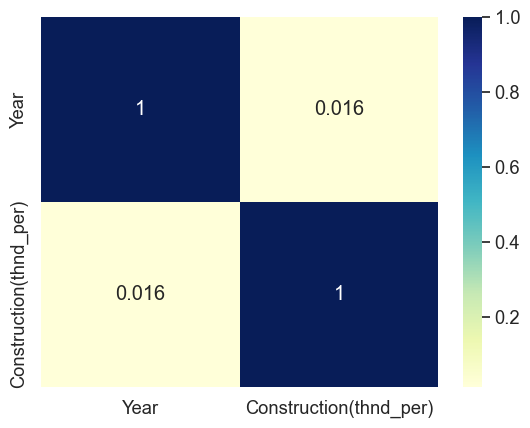

In [108]:
#?
# heatmap
sns.heatmap(cor2, cmap="YlGnBu", annot=True)
plt.show()

In [109]:
# split into X dependent and y independent 
X = top_five_employ.drop(['Construction(thnd_per)'],axis=1)

y = top_five_employ['Construction(thnd_per)']
 
    

In [110]:
# Create dummy variables for categorical data (countries)
# creating dummy variables for categorical variables

# subset all categorical variables
employ_categorical = X.select_dtypes(include=['object'])
employ_categorical.head()

Country
0     AUT
1     AUT
2     AUT
3     AUT
4     AUT

In [111]:
# convert into dummies 1 and 0
employ_dummies = pd.get_dummies(employ_categorical, drop_first=False)
employ_dummies.head()

Country_AUT  Country_BEL  Country_IRL  Country_LUX  Country_NLD
0            1            0            0            0            0
1            1            0            0            0            0
2            1            0            0            0            0
3            1            0            0            0            0
4            1            0            0            0            0

In [112]:
# drop categorical variables 
X = X.drop(list(employ_categorical.columns), axis=1)

In [113]:
# concat dummy variables with X
X = pd.concat([X, employ_dummies], axis=1)

In [114]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Year', 'Country_AUT', 'Country_BEL', 'Country_IRL', 'Country_LUX',
       'Country_NLD'],
      dtype='object')

In [115]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.70, #70% for train, 30 for test inicially, then changed to 75/25
                                                    test_size = 0.30, random_state=100)
#change numbers to see how affect the model

In [116]:
#recheck correlation after encoding categoricals?
corr3 = X.corr()
corr3

Year   Country_AUT   Country_BEL   Country_IRL  \
Year         1.000000e+00  3.229740e-17 -1.614870e-17  1.087934e-17   
Country_AUT  3.229740e-17  1.000000e+00 -2.500000e-01 -2.500000e-01   
Country_BEL -1.614870e-17 -2.500000e-01  1.000000e+00 -2.500000e-01   
Country_IRL  1.087934e-17 -2.500000e-01 -2.500000e-01  1.000000e+00   
Country_LUX  1.289793e-17 -2.500000e-01 -2.500000e-01 -2.500000e-01   
Country_NLD  1.929431e-17 -2.500000e-01 -2.500000e-01 -2.500000e-01   

              Country_LUX   Country_NLD  
Year         1.289793e-17  1.929431e-17  
Country_AUT -2.500000e-01 -2.500000e-01  
Country_BEL -2.500000e-01 -2.500000e-01  
Country_IRL -2.500000e-01 -2.500000e-01  
Country_LUX  1.000000e+00 -2.500000e-01  
Country_NLD -2.500000e-01  1.000000e+00

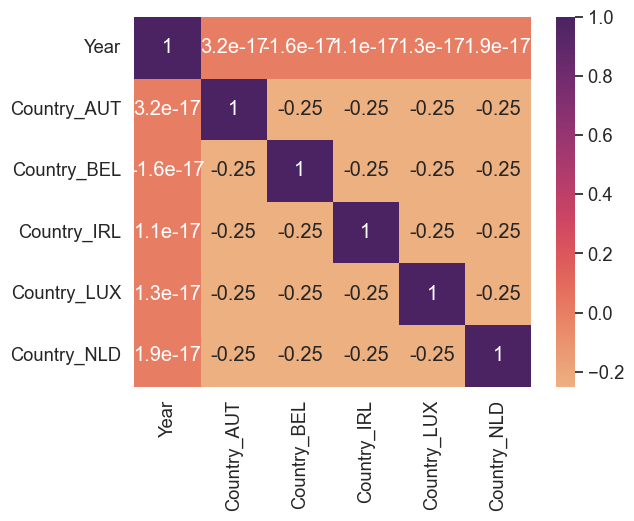

In [117]:
#?
# heatmap
sns.heatmap(corr3, cmap="flare", annot=True)
plt.show()

#No collinearity assumption: if there are highly correlated predictors, it’s most likely your model will overfit
#but would a low correlation result in underfitting?

## Model Building and Evaluation

### Ridge and Lasso Regression

Let's now try predicting the amount of people the will work in construction with the dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression using Cross Validation

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_theme();

In [119]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 1.0, 2.0, 3.0,4.0,
                    5.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001063      0.000267         0.000719        0.000596      0.0001   
1       0.000803      0.000117         0.000429        0.000043       0.001   
2       0.000686      0.000052         0.000388        0.000033        0.01   
3       0.000592      0.000041         0.000356        0.000003        0.05   
4       0.000560      0.000003         0.000356        0.000009         1.0   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -2.401499         -10.416388         -19.539280   
1   {'alpha': 0.001}          -2.401001         -10.416349         -19.538552   
2    {'alpha': 0.01}          -2.410163         -10.415954         -19.531276   
3    {'alpha': 0.05}          -2.538655         -10.414182         -19.498980   
4     {'alpha': 1.0}          -6.880621         -10.365293         -19.679124   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -9.298715  ...       -11.246148        5.702020                3   
1          -9.299028  ...       -11.245807        5.701855                2   
2          -9.302159  ...       -11.245221        5.695812                1   
3          -9.316070  ...       -11.260184        5.641802                4   
4         -11.835414  ...       -12.756723        4.339417                5   

   split0_train_score  split1_train_score  split2_train_score  \
0          -11.259979           -9.781916           -6.997153   
1          -11.259658           -9.781957           -6.997543   
2          -11.256448           -9.782364           -7.001438   
3          -11.242208           -9.792950           -7.018736   
4          -12.341237          -10.945832           -8.303263   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -9.414955           -8.704415         -9.231684         1.394379  
1           -9.414631           -8.704051         -9.231568         1.394183  
2           -9.411389           -8.700414         -9.230411         1.392225  
3           -9.403619           -8.684510         -9.228404         1.384433  
4          -10.809627           -9.728385        -10.425669         1.347457  

[5 rows x 21 columns]

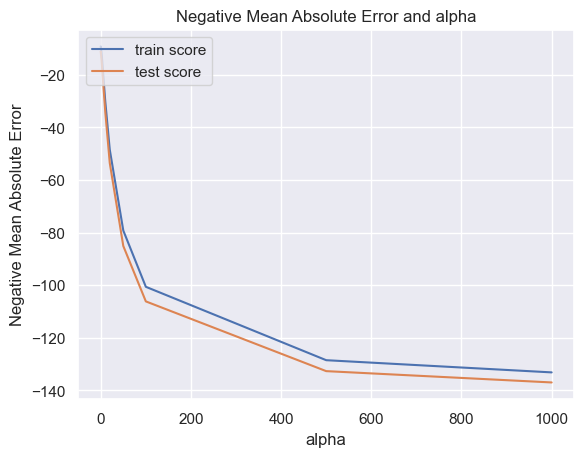

In [121]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [122]:
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([  0.13289318,   8.17034341,   5.87119464,  -9.89167585,
       -16.89881758,  12.74895537])

### Lasso


In [123]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001901      0.000745         0.000955        0.000334      0.0001   
1       0.001585      0.000562         0.000636        0.000141       0.001   
2       0.001521      0.000374         0.000816        0.000264        0.01   
3       0.001031      0.000074         0.000458        0.000095        0.05   
4       0.000611      0.000022         0.000367        0.000035         1.0   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -2.401580         -10.416302         -19.539300   
1   {'alpha': 0.001}          -2.401836         -10.415488         -19.538563   
2    {'alpha': 0.01}          -2.404365         -10.407343         -19.532903   
3    {'alpha': 0.05}          -2.431278         -10.371141         -19.507913   
4     {'alpha': 1.0}          -3.853027          -9.843030         -19.107889   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -9.298592  ...       -11.246137        5.702018                4   
1          -9.297723  ...       -11.245668        5.701786                3   
2          -9.289941  ...       -11.241498        5.699916                2   
3          -9.254988  ...       -11.226049        5.686850                1   
4          -9.992938  ...       -11.401339        5.072817                5   

   split0_train_score  split1_train_score  split2_train_score  \
0          -11.259986           -9.781886           -6.997109   
1          -11.259667           -9.781662           -6.997110   
2          -11.256538           -9.779416           -6.996988   
3          -11.242629           -9.773651           -6.996433   
4          -11.393253           -9.923199           -7.245196   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -9.414976           -8.704444         -9.231680         1.394391  
1           -9.414825           -8.704308         -9.231515         1.394287  
2           -9.413502           -8.702946         -9.229878         1.393306  
3           -9.407549           -8.696907         -9.223434         1.389284  
4           -9.829757           -8.876902         -9.453661         1.366302  

[5 rows x 21 columns]

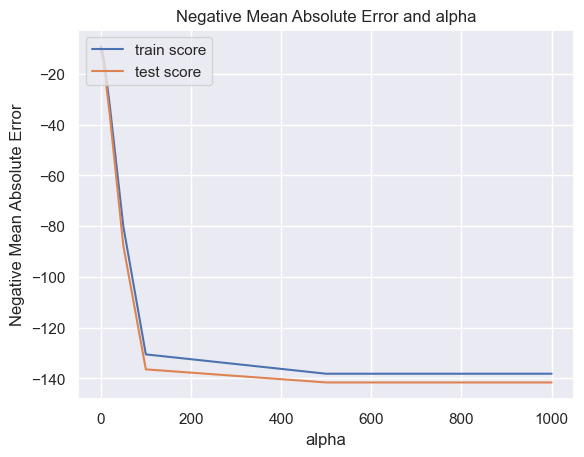

In [125]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [126]:
alpha = 10
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=10)

In [127]:
lasso.coef_

array([   0.        ,    3.91577449,    0.        ,  -75.79225065,
       -114.80190022,   26.78865466])

## different alphas result in different coeficients.

Using alpha = 200, this is the result of lasso.coef = array([ 0.,  0.,  0., -0., -0.,  0.])

While a smaller alpha = 100 has a lasso.coef = array([  0.        ,   0.        ,   0.        , -27.80929893,
       -66.81842241,   9.62994835])

And alpha = 50 has lasso coeficient = array([  0.        ,   0.        ,   0.        , -27.80929893,
       -66.81842241,   9.62994835])
       
Lasso(alpha=10) coef output is  array([   0.        ,    3.91577449,    0.        ,  -75.79225065,
       -114.80190022,   26.78865466])      


### Linear Regression

In [128]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an OLS model

LinearRegression()

In [129]:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [130]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9917348153665513
-----Test set statistics-----
R-squared of the model in test set is: 0.9862184610204969
Root mean squared error of the prediction is: 17.636810647163173
Mean absolute percentage error of the prediction is: 7.508346239136028


## Data Preparation for Regression Models

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


The Decision Tree Model is not entirely  applicable in this dataset due to the constinuous variable of Year and cannot be used for regression, unless the Year variable is not considered in the model? I kept getting a error message
*tried applying the model and got an #ValueError: Unknown label type: 'continuous'* because of that so tried another way. SkitLearn also has a DecisionTreeRegressor application that can be used too. So will try the model again but now using a merged version with additional variables. using the merged_df we can extract data for each country combining GDP with Employment variables

In [132]:
#what if i use this merged dataset with all country's variables together?
# select values for "IRL"
ireland_df = merged_df[merged_df['Country'] == 'IRL']
display(ireland_df)

Country  Year   GDP(USD_cap)  Construction(thnd_per)  \
22     IRL  2012   46409.672305                  83.400   
23     IRL  2013   47882.067704                  85.925   
24     IRL  2014   51195.980951                  93.775   
25     IRL  2015   69165.900652                 108.775   
26     IRL  2016   71633.128805                 118.600   
27     IRL  2017   78051.654251                 128.675   
28     IRL  2018   84824.335541                 143.375   
29     IRL  2019   89846.694028                 146.975   
30     IRL  2020   94037.963161                 137.175   
31     IRL  2021  106879.157958                 138.600   
32     IRL  2022  128343.445998                 165.200   

    Investment in Dwellings(%_GFCF)  
22                         7.554522  
23                         8.459331  
24                         8.588170  
25                         6.126625  
26                         5.058166  
27                         6.335418  
28                         8.190615  
29                         4.226417  
30                         5.049045  
31                         9.020828  
32                         9.611396

In [133]:
ireland_df.head()

Country  Year  GDP(USD_cap)  Construction(thnd_per)  \
22     IRL  2012  46409.672305                  83.400   
23     IRL  2013  47882.067704                  85.925   
24     IRL  2014  51195.980951                  93.775   
25     IRL  2015  69165.900652                 108.775   
26     IRL  2016  71633.128805                 118.600   

    Investment in Dwellings(%_GFCF)  
22                         7.554522  
23                         8.459331  
24                         8.588170  
25                         6.126625  
26                         5.058166

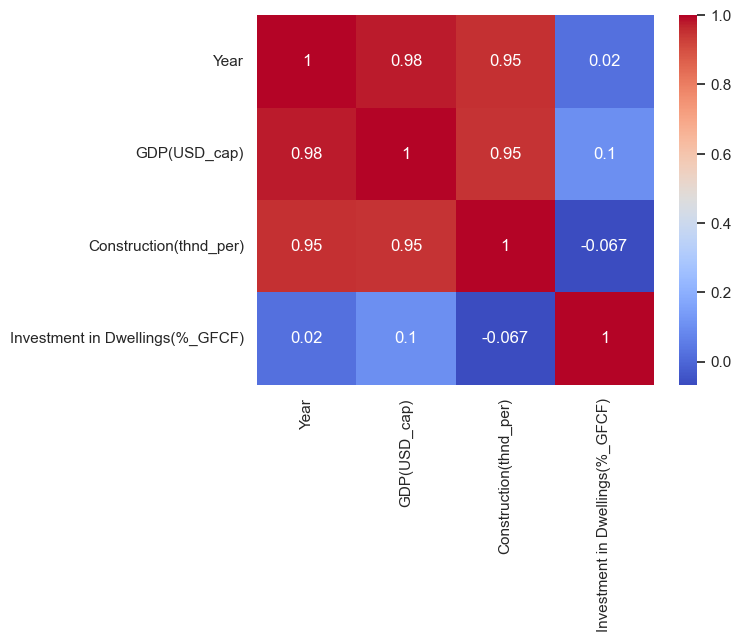

In [134]:
# check correlation between variables and display with another heatmap

correlation_irl = ireland_df.corr()



# seaborn heatmap
sns.heatmap(correlation_irl, cmap="coolwarm", annot=True)
plt.show()

In [135]:
# Separate the target variable (employment) and input features

X = ireland_df.drop('Construction(thnd_per)', axis=1)
y = ireland_df['Construction(thnd_per)']

In [136]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

ENcoding IRL labels using dummy variables

In [137]:
# Create dummy variables for categorical data (countries)
# creating dummy variables for categorical variables

# subset all categorical variables
categorical_irl = X.select_dtypes(include=['object'])
categorical_irl.head()


Country
22     IRL
23     IRL
24     IRL
25     IRL
26     IRL

In [138]:
# convert into dummies 1 and 0, since we only have IRL as categorical >>> 
  
    # IRL = 1
    
irl_dummies = pd.get_dummies(categorical_irl, drop_first=False)
irl_dummies.head()

Country_IRL
22            1
23            1
24            1
25            1
26            1

In [139]:
# drop categorical variables 
X = X.drop(list(categorical_irl.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, irl_dummies], axis=1)



In [140]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (possibly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Year', 'GDP(USD_cap)', 'Investment in Dwellings(%_GFCF)',
       'Country_IRL'],
      dtype='object')

In [141]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.70, #70% for train, 30 for test 
                                                    test_size = 0.30, random_state=100)
#change numbers to see how affect the model ?

In [142]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 4)
(4, 4)
(7,)
(4,)


### Ridge Regression Using Cross Validation

In [143]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001236      0.000257         0.000876        0.000538      0.0001   
1       0.001200      0.000360         0.000548        0.000079       0.001   
2       0.000914      0.000278         0.000552        0.000118        0.01   
3       0.001152      0.000294         0.000614        0.000147        0.05   
4       0.001082      0.000310         0.000541        0.000051         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -9.382249          -8.631949          -4.038144   
1   {'alpha': 0.001}          -9.119860          -8.624800          -4.022469   
2    {'alpha': 0.01}          -7.100161          -8.560387          -3.878318   
3    {'alpha': 0.05}          -4.223892          -8.386448          -3.433038   
4     {'alpha': 0.1}          -3.073604          -8.315200          -3.122367   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0         -60.275707  ...       -19.421578       20.709707               23   
1         -58.980291  ...       -19.100206       20.228661               22   
2         -49.615083  ...       -16.732961       16.798782               21   
3         -35.118729  ...       -12.978152       11.658460               14   
4         -30.324133  ...       -11.589340       10.082029               11   

   split0_train_score  split1_train_score  split2_train_score  \
0           -3.329251           -1.520695           -3.203785   
1           -3.332073           -1.520391           -3.200829   
2           -3.353385           -1.517295           -3.173871   
3           -3.387810           -1.684691           -3.113419   
4           -3.395823           -1.849255           -3.127704   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -3.065826           -0.988257         -2.421563         0.971264  
1           -3.053596           -0.986983         -2.418774         0.970138  
2           -2.965392           -0.975886         -2.397166         0.962779  
3           -3.021951           -0.982016         -2.437978         0.936664  
4           -3.157802           -1.080197         -2.522156         0.901784  

[5 rows x 21 columns]

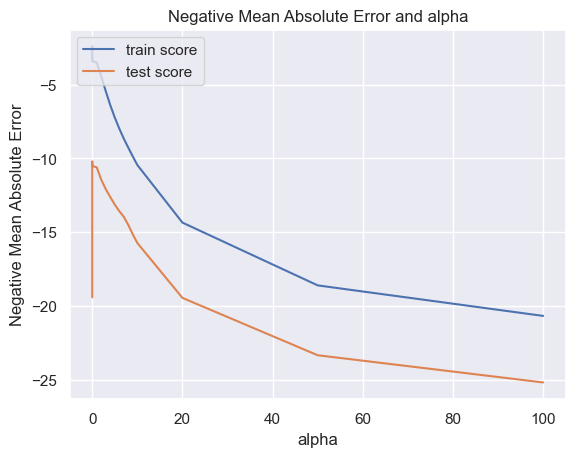

In [145]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [146]:
# get the ridge coeficient
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.68604245,  7.792089  , -1.1795494 ,  0.        ])

In [147]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

Ridge Regression MSE: 101.63578976028722


### Lasso Regression using Cross Validation for improving the training 

In [148]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [149]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001224      0.000461         0.000635        0.000124      0.0001   
1       0.000847      0.000204         0.000428        0.000049       0.001   
2       0.001292      0.000303         0.000635        0.000041        0.01   
3       0.000911      0.000141         0.000512        0.000084        0.05   
4       0.000684      0.000013         0.000379        0.000004         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -9.405494          -8.631964          -4.038164   
1   {'alpha': 0.001}          -9.345560          -8.627087          -4.022711   
2    {'alpha': 0.01}          -8.753392          -8.648473          -4.015283   
3    {'alpha': 0.05}          -6.279464          -8.743524          -3.989638   
4     {'alpha': 0.1}          -5.285328          -8.862339          -3.957581   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0         -60.373119  ...       -19.446827       20.745635               23   
1         -59.904792  ...       -19.341172       20.568601               22   
2         -55.257959  ...       -18.293396       18.796491               21   
3         -35.680716  ...       -13.884899       11.471411               20   
4         -35.505058  ...       -13.653140       11.536782               19   

   split0_train_score  split1_train_score  split2_train_score  \
0           -3.328979           -1.520689           -3.203733   
1           -3.329429           -1.520262           -3.200321   
2           -3.333843           -1.513883           -3.198066   
3           -3.352591           -1.485533           -3.189641   
4           -3.352196           -1.479709           -3.179111   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -3.066726           -0.988613         -2.421748         0.971221  
1           -3.062121           -0.990320         -2.420491         0.969721  
2           -3.016384           -0.993398         -2.411115         0.964574  
3           -2.944980           -1.007129         -2.395975         0.959607  
4           -2.947906           -1.024300         -2.396644         0.954287  

[5 rows x 21 columns]

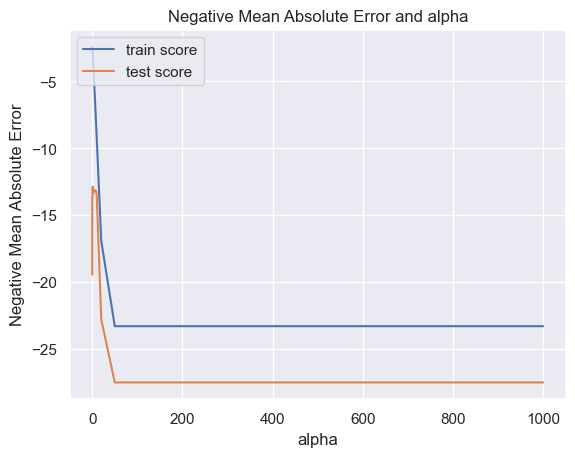

In [150]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [151]:
alpha = 2.5

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=2.5)

In [152]:
lasso.coef_

array([14.40670374,  8.86914461, -0.17010673,  0.        ])

In [153]:
# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)

Lasso Regression MSE: 103.59529366106325


### Linear Regression + Predictions
        

In [154]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an OLS model

LinearRegression()

In [155]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #used for predictions

In [156]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9787592490310921
-----Test set statistics-----
R-squared of the model in test set is: 0.7956908189650976
Root mean squared error of the prediction is: 10.257715176767952
Mean absolute percentage error of the prediction is: 6.110056351273669


In [157]:

# calculate the average values for each column
avg_employ = ireland_df['Construction(thnd_per)'].mean()
avg_gdp = ireland_df['GDP(USD_cap)'].mean()

# create arrays for the independent and dependent variables
x = np.array(ireland_df['Year']).reshape((-1, 1))
y = np.array(ireland_df['Construction(thnd_per)'])

# create a linear regression model and fit the data
model = LinearRegression().fit(x, y)

# predict the value of payments for the next 5 years
future_years = np.array([2023, 2024, 2025, 2026, 2027]).reshape((-1, 1))
future_predictions = model.predict(future_years)

# print the predicted values
print('Predicted values for the next 5 years:')
for i, prediction in enumerate(future_predictions):
    print(f'{2023 + i}: {int(prediction)}')

Predicted values for the next 5 years:
2023: 169
2024: 176
2025: 184
2026: 192
2027: 200


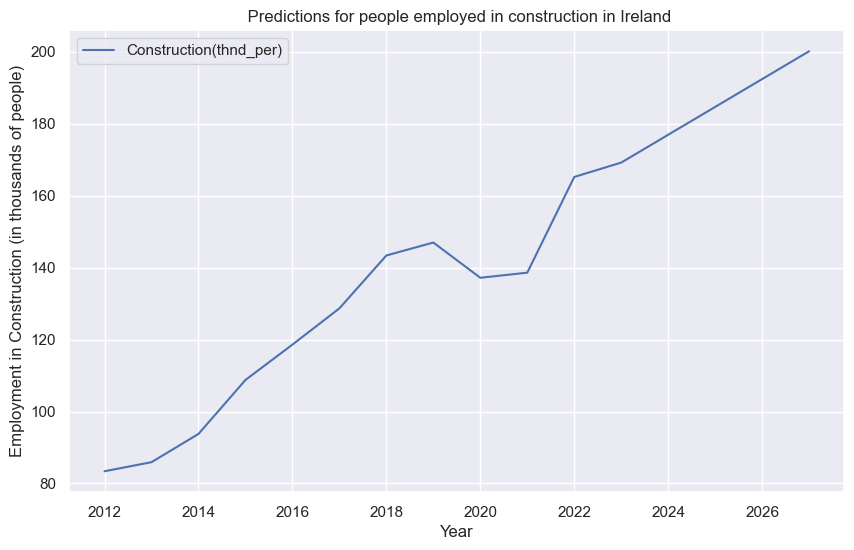

In [158]:
# create a new DataFrame with future years and predictions given

df_pred = pd.DataFrame({'Year': [2023, 2024, 2025, 2026, 2027], 'Construction(thnd_per)': future_predictions})

# concatenate the original DataFrame and the new DataFrame
irl_pred = pd.concat([ireland_df, df_pred], ignore_index=False)

# create a line plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(irl_pred['Year'], irl_pred['Construction(thnd_per)'], label='Construction(thnd_per)')
ax.set_xlabel('Year')
ax.set_ylabel('Employment in Construction (in thousands of people)')
ax.set_title(' Predictions for people employed in construction in Ireland')
ax.legend()
plt.show()

## Decision Tree Regressor:

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [160]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [161]:
y_pred_DT = DTregressor.predict(X_test)

In [162]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.5291339863344702
Root mean squared error of the prediction is: 16.48677500301378
Mean absolute percentage error of the prediction is: 10.016433632918336


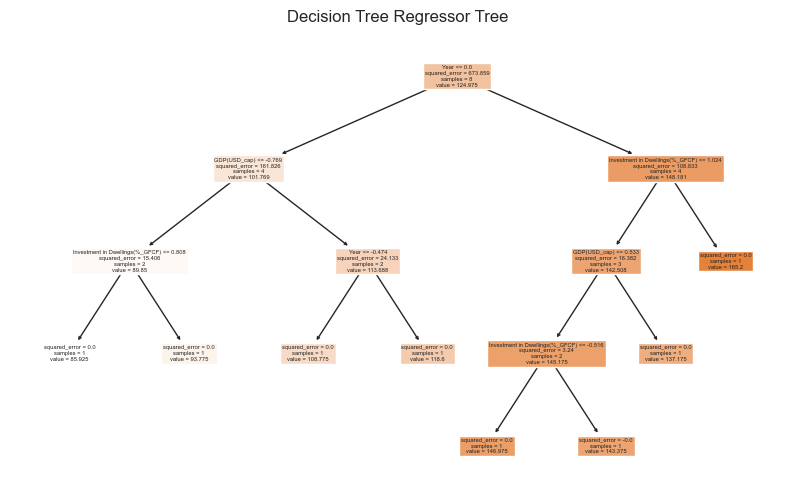

In [163]:
# plot the tree!
# Create visual representation of Decision Tree Regressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree regressor tree
plt.figure(figsize=(10, 6))
plot_tree(DTregressor, feature_names=X.columns, filled=True)
plt.title("Decision Tree Regressor Tree")
plt.show()

# Hard to interpret values on this tree

In [164]:
# Trying other libraries to better see results

# Importing required packages for visualization

from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
# using Graphiz library

dot_data = StringIO()
export_graphviz(DTregressor, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns)

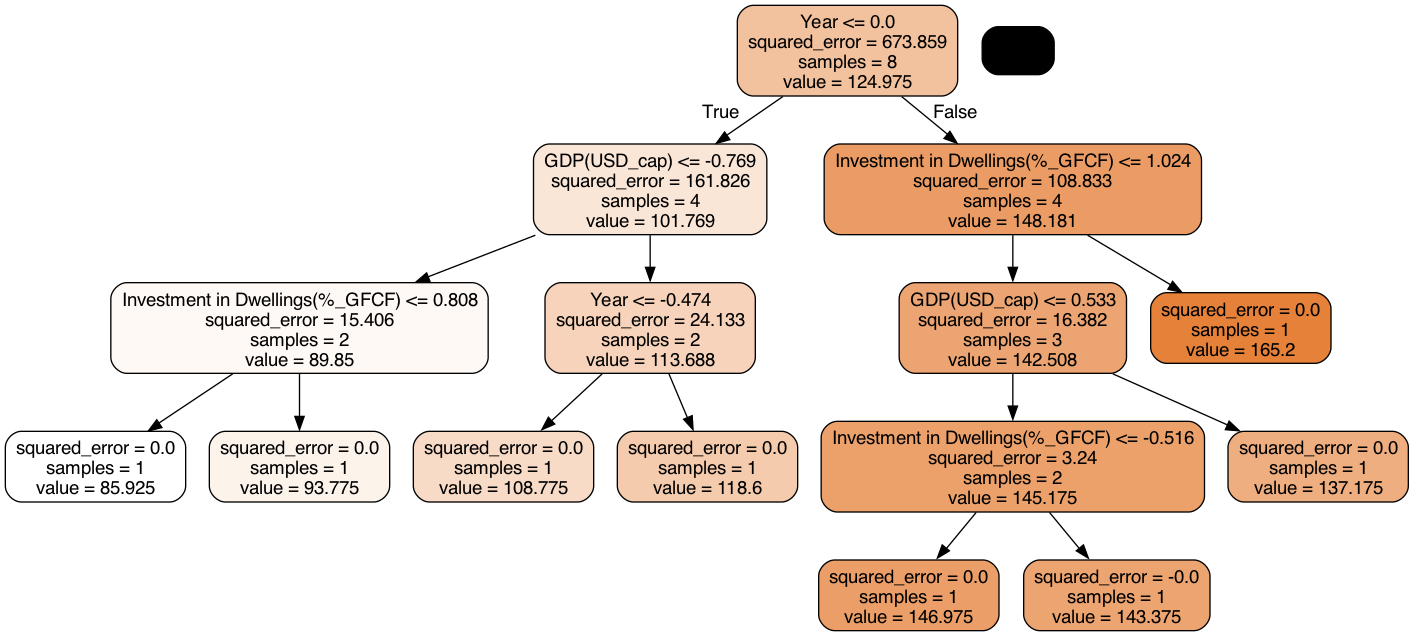

In [165]:
# cretate pydotplus graph from dot_data




graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#plot tree
Image(graph.create_png())

### Hyperparameter Tuning
     Tuning max-depth to  find the  maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value. [help(DecisionTreeClassifier)]
     
   The goal of using this parameter is to obtain a score function to confirm the accuracy of the model

In [166]:
# check shape of samples for X and y
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8, 4)
y_train shape: (8,)
X_test shape: (3, 4)
y_test shape: (3,)


In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {'max_depth': [3, 5, 7, 9]}

# Create the decision tree regressor
y_pred_DT = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(y_pred_DT, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_max_depth = grid_search.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for prediction
y_pred = best_model.predict(X_test)

Best max_depth: 3


In [168]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-squared: 0.5291339863344702
Mean Squared Error: 271.81375
Root Mean Squared Error: 16.48677500301378
Mean Absolute Error: 13.066666666666668


### Random Forest

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [171]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [172]:
y_pred_random = regressor.predict(X_test)

In [173]:

print("R-squared of the model in training set is: {}".format(regressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100))

R-squared of the model in training set is: 0.94708838710979
-----Test set statistics-----
R-squared of the model in test set is: 0.9164864591967328
Root mean squared error of the prediction is: 6.943292917749204
Mean absolute percentage error of the prediction is: 6.403872979187132


In [174]:
# plot forest?
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(ireland_df.columns[1:])
features

['Year',
 'GDP(USD_cap)',
 'Construction(thnd_per)',
 'Investment in Dwellings(%_GFCF)']

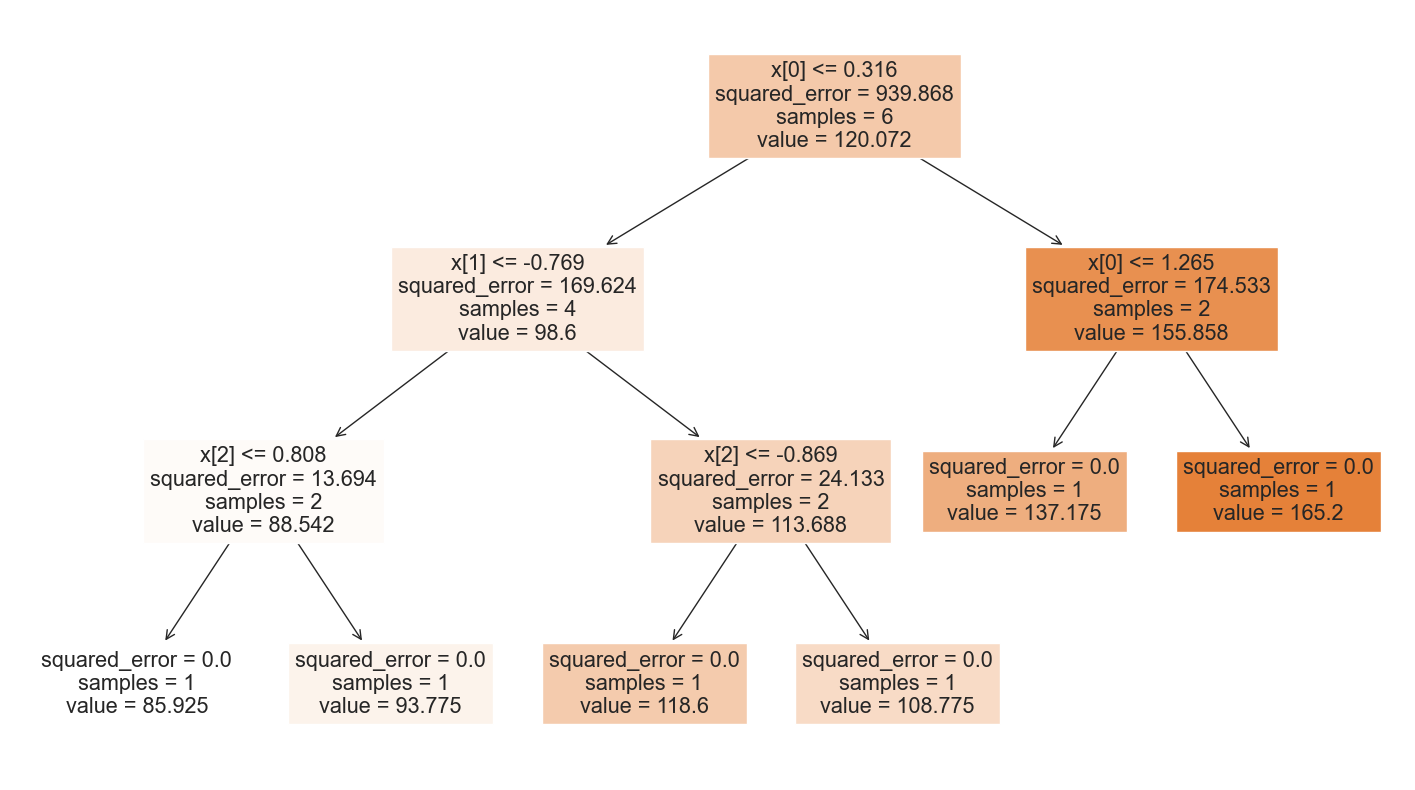

In [175]:
# Create visual representation of RandomForest Tree

from sklearn.tree import plot_tree 

plt.figure(figsize=(18,10))
plot_tree(regressor.estimators_[0], filled=True)
plt.show()

## Creating a Dashboard to better present and share results!


In [176]:
#pip install jupyter-dash

> to create the dashboard with the plots already present in this notebook, i had to go back in the code to rename all figures created with Plotly Express so i could called the back in the dash app

In [179]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output

# Create the Dash app
app = JupyterDash("ca2_dash", suppress_callback_exceptions=True)

# Define the layout of the app
app.layout = html.Div([
    html.H1("CA 2 -  Dashbord for Data Visualisation"),
    dcc.Graph(id='Planning Permissions (1977 to 2022)', figure=fig1),
    dcc.Graph(id='GDP per Capita Euro Area', figure=figure),
    dcc.Graph(id='GDP per Capita Euro Area Progression 2012-2022', figure=fig_gdp),
    dcc.Graph(id='Values by Country', figure=figA),
    dcc.Graph(id='Euro Area: Employment rates by activity - Construction (in thousands of people)', figure=fig_ec),

    #   dcc.Graph(id='DecisionTreeRegressor', figure=graph), # coudnt add my DT to dash? json error?
  
    dcc.Dropdown(
        id="colorscale-dropdown",
        options=[
            {"label": "Viridis", "value": "viridis"},
            {"label": "Plasma", "value": "plasma"},
            # Add more color scale options as needed
        ],
        value="viridis"
    ),
    # Add the output graph component
])

# Define the callback function to update the graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
       return px.scatter(
         df, x="total_bill", y="tip", color="size",
            color_continuous_scale=colorscale,
            render_mode="webgl", title="Tips"
       )

# Run app and display result inline in the notebook

if __name__ == '__main__':
    app.run_server(mode='inline',debug=True, port=8051)  

    


Dash is running on http://127.0.0.1:8051/



<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.